In [2]:
# !pip install pandas numpy
# !pip install matplotlib seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("../data/csv/food.csv", sep=";")

## 🔹 Información General

- **Category**: Categoría general del alimento.  
  *Ejemplo:* `"Leche"`

- **Description**: Descripción completa del alimento y sus subcategorías.  
  *Ejemplo:* `"Leche, humana"`

- **Nutrient Data Bank Number**: Identificador único del alimento en la base de datos.  
  *Ejemplo:* `11000000`

---

## 🥕 Vitaminas y Compuestos Vegetales

- **Alpha Carotene / Beta Carotene / Beta Cryptoxanthin / Lutein and Zeaxanthin / Lycopene**  
  Pigmentos vegetales con propiedades antioxidantes.  
  *Unidad:* microgramos (mcg)

- **Retinol**: Vitamina A en forma activa, esencial para la vista e inmunidad.  
  *Unidad:* mcg

- **Niacin / Riboflavin / Thiamin / Vitamin B6 / Vitamin B12**  
  Vitaminas del grupo B, necesarias para el metabolismo y producción de energía.  
  *Unidades:* mg (excepto B12 en mcg)

- **Vitamin A - RAE**: Equivalente de actividad de retinol, otra forma de medir la vitamina A.  
  *Unidad:* mcg

- **Vitamin C / Vitamin E / Vitamin K**  
  - **C**: Antioxidante, refuerza el sistema inmunológico.  
  - **E**: Protege las células del daño oxidativo.  
  - **K**: Coagulación sanguínea y salud ósea.  
  *Unidades:* mg (C y E), mcg (K)

---

## 🍞 Macronutrientes

- **Carbohydrate**: Azúcares y almidones del alimento.  
  *Unidad:* gramos (g)

- **Sugar Total**: Todos los azúcares simples presentes.  
  *Unidad:* g

- **Fiber**: Parte vegetal no digerible, ayuda a la digestión.  
  *Unidad:* g

- **Protein**: Componente esencial para tejidos, músculos y enzimas.  
  *Unidad:* g

- **Water**: Cantidad de agua contenida en el alimento.  
  *Unidad:* g

---

## 🧈 Grasas

- **Fat.Total Lipid**: Suma de todas las grasas presentes en el alimento.  
  *Unidad:* g

- **Fat.Saturated Fat**: Grasas saturadas, menos saludables.  
  *Unidad:* g

- **Fat.Monosaturated Fat**: Grasas monoinsaturadas, más saludables (ej. aceite de oliva).  
  *Unidad:* g

- **Fat.Polysaturated Fat**: Grasas poliinsaturadas (ej. omega-3), esenciales para la salud.  
  *Unidad:* g

---

## 🩸 Colesterol y Colina

- **Cholesterol**: Presente solo en productos animales, necesario en pequeñas cantidades.  
  *Unidad:* mg

- **Choline**: Nutriente esencial para el sistema nervioso.  
  *Unidad:* mg

---

## 🧱 Minerales

- **Calcium**: Fundamental para huesos y dientes.  
  *Unidad:* mg

- **Iron**: Necesario para la sangre y el transporte de oxígeno.  
  *Unidad:* mg

- **Magnesium**: Regula funciones musculares, nerviosas y metabólicas.  
  *Unidad:* mg

- **Phosphorus**: Fortalece huesos y participa en la producción de energía.  
  *Unidad:* mg

- **Potassium**: Equilibrio de líquidos, contracción muscular.  
  *Unidad:* mg

- **Sodium**: Control del balance hídrico y presión arterial.  
  *Unidad:* mg

- **Zinc**: Inmunidad, cicatrización y división celular.  
  *Unidad:* mg

- **Copper**: Esencial para el metabolismo y órganos.  
  *Unidad:* mg

- **Selenium**: Antioxidante necesario en pequeñas cantidades.  
  *Unidad:* mcg


In [5]:
df.head(5)
print(df.shape)

(7083, 38)


In [6]:
# Basic statistics and data exploration
def explore_data(df):
    print("\n--- Basic Dataset Information ---")
    print(f"Dataset Shape: {df.shape}")
    print(f"Number of Rows: {df.shape[0]}")
    print(f"Number of Columns: {df.shape[1]}")

    
    print("\n--- Data Types ---")
    print(df.dtypes)
    
    print("\n--- Missing Values ---")
    missing = df.isnull().sum()
    print(missing)
    
    return None

_ = explore_data(df)



--- Basic Dataset Information ---
Dataset Shape: (7083, 38)
Number of Rows: 7083
Number of Columns: 38

--- Data Types ---
Category                           object
Description                        object
Nutrient Data Bank Number         float64
Data.Alpha Carotene               float64
Data.Beta Carotene                float64
Data.Beta Cryptoxanthin           float64
Data.Carbohydrate                 float64
Data.Cholesterol                  float64
Data.Choline                      float64
Data.Fiber                        float64
Data.Lutein and Zeaxanthin        float64
Data.Lycopene                     float64
Data.Niacin                       float64
Data.Protein                      float64
Data.Retinol                      float64
Data.Riboflavin                   float64
Data.Selenium                     float64
Data.Sugar Total                  float64
Data.Thiamin                      float64
Data.Water                        float64
Data.Fat.Monosaturated Fat        fl

Tras un vistazo rápido se puede observar que hay dos elementos de tipo object que son los elementos de texto del archivo y que son los dos únicos que no tienen ningún nulo. El resto de variables son de tipo float64 y todos tienen 186 valores nulos. También se observa que el conjunto de datos tiene 7083 filas y 38 columnas.

Antes de comenzar a hacer los analisis, cambiaré el nombre de las variables para poder buscarlas con más facilidad. También eliminaré del conjunto de datos la variable **Nutrient Data Bank Number** debido a que es un ID del alimento y no sirve para el analisis descriptivo ni la limpieza

In [7]:
df.columns = (
    df.columns
    .str.lower()           # Poner todo en minúsculas
    .str.replace('data.', '', regex=False)  # Quitar 'data.'
    .str.replace(' ', '_')  # Reemplazar espacios por guión bajo
)

print(df.columns.tolist())

['category', 'description', 'nutrient_data_bank_number', 'alpha_carotene', 'beta_carotene', 'beta_cryptoxanthin', 'carbohydrate', 'cholesterol', 'choline', 'fiber', 'lutein_and_zeaxanthin', 'lycopene', 'niacin', 'protein', 'retinol', 'riboflavin', 'selenium', 'sugar_total', 'thiamin', 'water', 'fat.monosaturated_fat', 'fat.polysaturated_fat', 'fat.saturated_fat', 'fat.total_lipid', 'major_minerals.calcium', 'major_minerals.copper', 'major_minerals.iron', 'major_minerals.magnesium', 'major_minerals.phosphorus', 'major_minerals.potassium', 'major_minerals.sodium', 'major_minerals.zinc', 'vitamins.vitamin_a_-_rae', 'vitamins.vitamin_b12', 'vitamins.vitamin_b6', 'vitamins.vitamin_c', 'vitamins.vitamin_e', 'vitamins.vitamin_k']


In [8]:
df.drop(columns=['nutrient_data_bank_number'], inplace=True)   
print(df.columns.tolist())

['category', 'description', 'alpha_carotene', 'beta_carotene', 'beta_cryptoxanthin', 'carbohydrate', 'cholesterol', 'choline', 'fiber', 'lutein_and_zeaxanthin', 'lycopene', 'niacin', 'protein', 'retinol', 'riboflavin', 'selenium', 'sugar_total', 'thiamin', 'water', 'fat.monosaturated_fat', 'fat.polysaturated_fat', 'fat.saturated_fat', 'fat.total_lipid', 'major_minerals.calcium', 'major_minerals.copper', 'major_minerals.iron', 'major_minerals.magnesium', 'major_minerals.phosphorus', 'major_minerals.potassium', 'major_minerals.sodium', 'major_minerals.zinc', 'vitamins.vitamin_a_-_rae', 'vitamins.vitamin_b12', 'vitamins.vitamin_b6', 'vitamins.vitamin_c', 'vitamins.vitamin_e', 'vitamins.vitamin_k']


In [9]:
print(df.duplicated().sum())

88


In [10]:
df[df.duplicated()].head(5)

,category,description,alpha_carotene,beta_carotene,beta_cryptoxanthin,carbohydrate,cholesterol,choline,fiber,lutein_and_zeaxanthin,...,major_minerals.phosphorus,major_minerals.potassium,major_minerals.sodium,major_minerals.zinc,vitamins.vitamin_a_-_rae,vitamins.vitamin_b12,vitamins.vitamin_b6,vitamins.vitamin_c,vitamins.vitamin_e,vitamins.vitamin_k
1921,Beef stew with potatoes and vegetables includi...,Beef stew with potatoes and vegetables includi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1922,Beef stew with potatoes and vegetables excludi...,Beef stew with potatoes and vegetables excludi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1924,Beef,"Beef, potatoes, and vegetables including carro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926,Beef,"Beef, potatoes, and vegetables including carro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927,Beef,"Beef, potatoes, and vegetables excluding carro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Con este pequeño vistazo, se puede ver que todos los duplicados vienen de los valores nulos, por lo que se procederá a eliminar estos valores.

In [11]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


Ahora que ya no hay duplicados, procederé a comprobar los nulos que quedan.

In [12]:
df.dropna(how='all', inplace=True)

A continuación procederé a eliminar todas las filas en donde todos sus valores o al menos el 80% de ellos sean nulos.

In [13]:
threshold = int(df.shape[1] * 0.2)  # Número mínimo de datos NO nulos requeridos
df = df.dropna(thresh=threshold)

In [14]:
print(df.isnull().sum())


category                     0
description                  0
alpha_carotene               0
beta_carotene                0
beta_cryptoxanthin           0
carbohydrate                 0
cholesterol                  0
choline                      0
fiber                        0
lutein_and_zeaxanthin        0
lycopene                     0
niacin                       0
protein                      0
retinol                      0
riboflavin                   0
selenium                     0
sugar_total                  0
thiamin                      0
water                        0
fat.monosaturated_fat        0
fat.polysaturated_fat        0
fat.saturated_fat            0
fat.total_lipid              0
major_minerals.calcium       0
major_minerals.copper        0
major_minerals.iron          0
major_minerals.magnesium     0
major_minerals.phosphorus    0
major_minerals.potassium     0
major_minerals.sodium        0
major_minerals.zinc          0
vitamins.vitamin_a_-_rae     0
vitamins

In [15]:
df['category'].unique()

array(['Milk', 'Buttermilk', 'Kefir', ...,
       'Vegetables as ingredient in curry',
       'Sauce as ingredient in hamburgers',
       'Industrial oil as ingredient in food'],
      shape=(2380,), dtype=object)

Viendo que hay muchas variables unicas dentro de **Category** no se realizará un gráfico viendo la cantidad de elementos hay de cada uno

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alpha_carotene,6897.0,39.329129,258.763009,0.0,0.000,0.000,0.000,4655.000
beta_carotene,6897.0,247.920110,1004.200736,0.0,0.000,7.000,67.000,14134.000
beta_cryptoxanthin,6897.0,4.854719,38.540041,0.0,0.000,0.000,1.000,1922.000
carbohydrate,6897.0,21.097825,22.098353,0.0,5.630,13.450,26.880,100.000
cholesterol,6897.0,34.752936,78.465747,0.0,0.000,7.000,48.000,3074.000
choline,6897.0,34.593925,44.447060,0.0,9.800,19.100,44.900,820.200
fiber,6897.0,1.716326,2.590478,0.0,0.100,1.000,2.200,46.200
lutein_and_zeaxanthin,6897.0,214.039147,1029.342593,0.0,0.000,16.000,72.000,15643.000
lycopene,6897.0,246.896042,1134.716651,0.0,0.000,0.000,0.000,45902.000
niacin,6897.0,2.666362,4.042345,0.0,0.511,1.441,3.462,127.500


A continuación, como se puede ver en los gráficos anteriores y en los datos mostrados anteriormente (mayormente max, min y media) la gran mayoría de las variables siguen distribuciones exponenciales, a continuación las analizaré una a una.

## Exploratory Data Analysis (EDA)

Se realizará un análisis descriptivo de las variables, diferenciandolas por las distribuciones explicadas al inicio: \
    -   Vitaminas y compuestos vegetales\
    -   Macronutrientes\
    -   Grasas\
    -   Colesterol y colina\
    -   Minerales

In [16]:
vitamins_vegetables = ["alpha_carotene", "beta_carotene", "beta_cryptoxanthin", "lutein_and_zeaxanthin", "lycopene", "retinol", "vitamins.vitamin_a_-_rae", "vitamins.vitamin_b12", "vitamins.vitamin_b6", "vitamins.vitamin_c", "vitamins.vitamin_e", "vitamins.vitamin_k"]
macronutrients = ["carbohydrate", "fiber", "protein", "sugar_total", "water"]
fat = ["fat.monosaturated_fat", "fat.polysaturated_fat", "fat.saturated_fat", "fat.total_lipid"]
colesterol_choline = ["cholesterol", "choline"]
minerals = ["major_minerals.calcium", "major_minerals.copper", "major_minerals.iron", "major_minerals.magnesium", "major_minerals.phosphorus", "major_minerals.potassium", "selenium", "major_minerals.sodium", "major_minerals.zinc"]

También añadiré una nueva variable, las **calorias** que se pueden calcular a partir de los carbohidratos, las proteinas y las grasas totales con la siguiente formula.

**Calories** = (carbohydrate * 4) + (protein * 4) + (fat.total_lipid * 9)

Teniendo en cuenta que todas ellas están en gramos se puede calcular sin tener que hacer ningún cambio de unidad. Con esto se obtendrán las calorias de cada alimento por cada 100 gramos de este.

In [17]:
df['calories'] = df['carbohydrate'] * 4 + df['protein'] * 4 + df['fat.total_lipid'] * 9
df['calories'] = df['calories'].round(2)
macronutrients.append('calories')

In [18]:
columns_to_plot = df.columns.to_list()
columns_to_plot.remove('category')
columns_to_plot.remove('description')

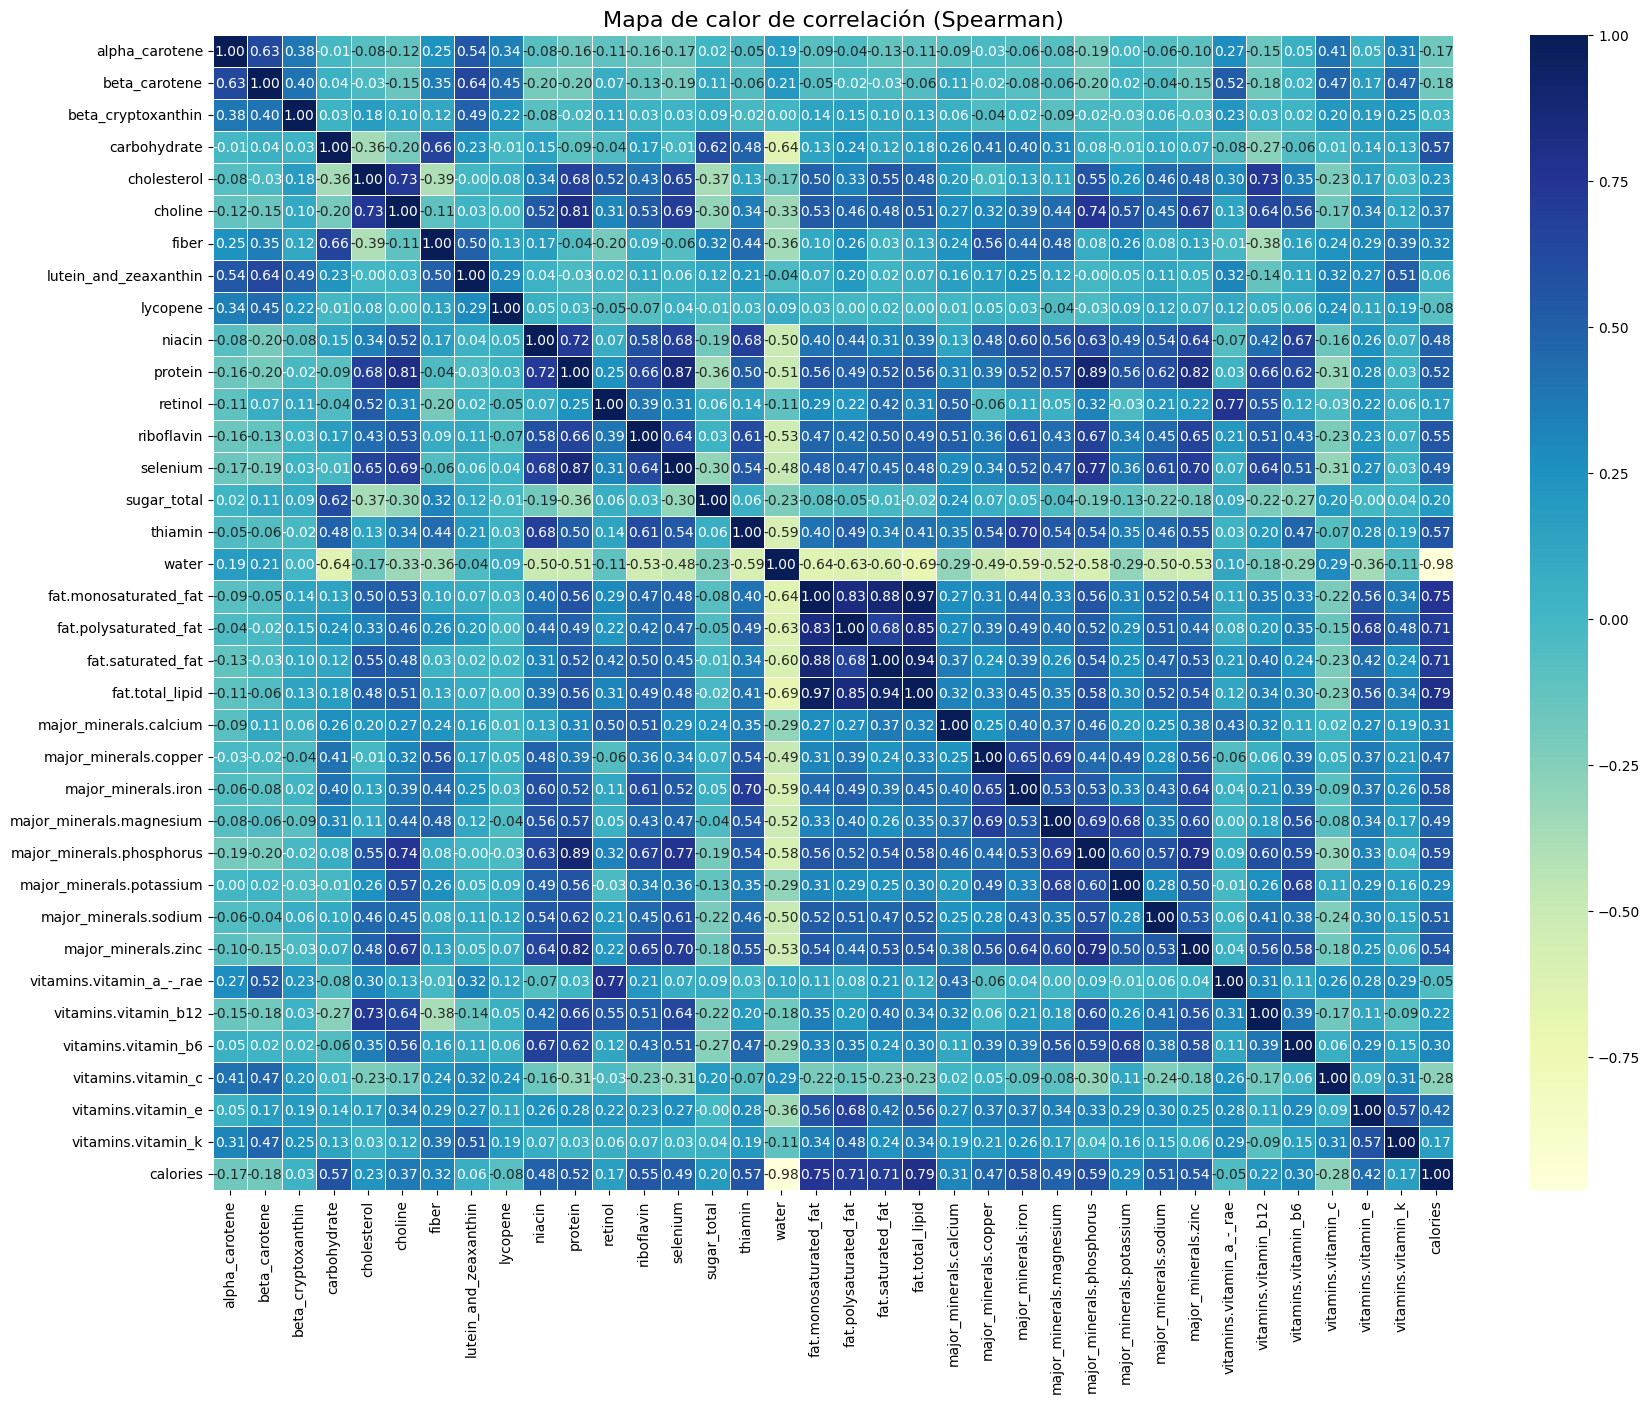

In [19]:
# Calcular la matriz de correlación para todas las variables en columns_to_plot
corrmat = df[columns_to_plot].corr(method='spearman')

# Crear un mapa de calor para visualizar la correlación
plt.figure(figsize=(20, 15))
sns.heatmap(corrmat, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Mapa de calor de correlación (Spearman)", fontsize=16)
plt.show()


## Análisis de Correlación entre Variables (Spearman)

### Correlaciones Positivas Altas
- **Fat_total_lipid y Fat_saturated_fat (0.94):** Hay una correlación muy alta entre el contenido total de lípidos y las grasas saturadas, lo que indica que los alimentos con alto contenido de lípidos tienden a tener también un alto contenido de grasas saturadas.
- **Major_minerals_calcium y Major_minerals_phosphorus (0.79):** Estos dos minerales están fuertemente correlacionados, sugiriendo que los alimentos ricos en calcio también tienden a ser ricos en fósforo.
- **Sugar_total y Carbohydrate (0.64):** Existe una correlación positiva significativa entre el contenido total de azúcares y los carbohidratos, lo que implica que los alimentos con alto contenido de carbohidratos suelen tener también un alto contenido de azúcares.
- **Vitamins_vitamin_b12 y Riboflavin (0.77):** La vitamina B12 y la riboflavina tienen una correlación alta, indicando que los alimentos ricos en una de estas vitaminas tienden a ser ricos en la otra.
- **Major_minerals_magnesium y Major_minerals_phosphorus (0.66):** El magnesio y el fósforo también presentan una correlación positiva notable, lo que sugiere que los alimentos ricos en magnesio suelen tener un alto contenido de fósforo.

### Correlaciones Negativas Relevantes
- **Water y Fat_total_lipid (-0.50):** Hay una correlación negativa moderada entre el contenido de agua y el contenido total de lípidos, lo que indica que los alimentos con alto contenido de agua tienden a tener menos lípidos.
- **Water y Fat_saturated_fat (-0.50):** Similar al caso anterior, los alimentos con alto contenido de agua tienden a tener menos grasas saturadas.
- **Water y Calories (-0.47):** El contenido de agua tiene una correlación negativa con las calorías, sugiriendo que los alimentos con más agua suelen tener menos calorías.
- **Vitamins_vitamin_c y Fat_total_lipid (-0.33):** La vitamina C tiene una correlación negativa con el contenido total de lípidos, indicando que los alimentos ricos en vitamina C tienden a tener menos lípidos.
- **Vitamins_vitamin_c y Fat_saturated_fat (-0.33):** De manera similar, los alimentos con alto contenido de vitamina C tienden a tener menos grasas saturadas.

### Observaciones Generales
- Las grasas (totales, saturadas, monoinsaturadas y poliinsaturadas) tienden a estar correlacionadas entre sí, mostrando valores positivos moderados a altos (0.60 a 0.94), lo que indica que los alimentos ricos en un tipo de grasa suelen ser ricos en los otros tipos.
- El contenido de agua tiene una relación inversa con varios nutrientes energéticos como las grasas y las calorías, lo que es esperado, ya que los alimentos con más agua suelen ser menos densos en energía.
- Las vitaminas y minerales tienden a formar grupos de correlación positiva entre sí (por ejemplo, calcio con fósforo, o vitamina B12 con riboflavina), lo que sugiere que ciertos alimentos son fuentes concentradas de múltiples nutrientes similares.

## Correlaciones Específicas con Calorías y Proteínas

Puesto que son datos en los que la gente se suele fijar, explicaré estos más en detalle.

### Correlaciones con Calorías (Calories)
- **Calories y Fat_total_lipid (0.75):** Existe una correlación positiva alta entre las calorías y el contenido total de lípidos, indicando que los alimentos con mayor contenido de lípidos tienden a tener un mayor valor calórico.
- **Calories y Fat_saturated_fat (0.71):** Las calorías están fuertemente correlacionadas con las grasas saturadas, sugiriendo que los alimentos ricos en grasas saturadas también tienden a ser más calóricos.
- **Calories y Carbohydrate (0.64):** Hay una correlación positiva significativa entre las calorías y los carbohidratos, lo que implica que los alimentos con alto contenido de carbohidratos suelen contribuir más al valor calórico total.
- **Calories y Water (-0.47):** Existe una correlación negativa moderada entre las calorías y el contenido de agua, sugiriendo que los alimentos con alto contenido de agua tienden a tener menos calorías.
- **Calories y Protein (0.57):** Las calorías también muestran una correlación positiva moderada con las proteínas, indicando que los alimentos ricos en proteínas tienden a tener un contenido calórico más alto, aunque en menor medida que las grasas y carbohidratos.

### Correlaciones con Proteínas (Protein)
- **Protein y Major_minerals_phosphorus (0.66):** Hay una correlación positiva alta entre las proteínas y el fósforo, lo que sugiere que los alimentos ricos en proteínas (como carnes o legumbres) suelen ser también ricos en fósforo.
- **Protein y Major_minerals_magnesium (0.57):** Las proteínas están moderadamente correlacionadas con el magnesio, indicando que los alimentos con alto contenido de proteínas tienden a contener más magnesio.
- **Protein y Calories (0.57):** Las proteínas tienen una correlación positiva moderada con las calorías, reflejando que los alimentos proteicos aportan una contribución calórica, aunque menor que las grasas o carbohidratos.
- **Protein y Fat_total_lipid (0.51):** Existe una correlación positiva moderada entre las proteínas y el contenido total de lípidos, sugiriendo que algunos alimentos ricos en proteínas (como carnes grasas) también tienden a tener más lípidos.
- **Protein y Niacin (0.50):** Las proteínas están correlacionadas positivamente con la niacina (vitamina B3), lo que es esperable, ya que alimentos ricos en proteínas como la carne también son buenas fuentes de esta vitamina.

### Observaciones Específicas
- Las calorías están fuertemente influenciadas por los lípidos y los carbohidratos, con correlaciones más altas que con las proteínas, lo que refleja la mayor densidad energética de las grasas y carbohidratos.
- Las proteínas muestran correlaciones positivas con minerales como fósforo y magnesio, lo que sugiere que los alimentos proteicos son también fuentes importantes de estos nutrientes.
- La relación inversa entre calorías y agua refuerza la idea de que los alimentos con alta humedad (como frutas y verduras) tienden a ser menos calóricos.

## Resumen
Este análisis muestra que las grasas están altamente correlacionadas entre sí, mientras que el agua tiende a tener una relación inversa con los lípidos y las calorías. Las calorías están fuertemente asociadas con lípidos y carbohidratos, y las proteínas se relacionan positivamente con fósforo, magnesio y niacina, además de contribuir moderadamente al contenido calórico. Además, algunos minerales y vitaminas (como calcio y fósforo, o vitamina B12 y riboflavina) tienden a aparecer juntos en los alimentos.

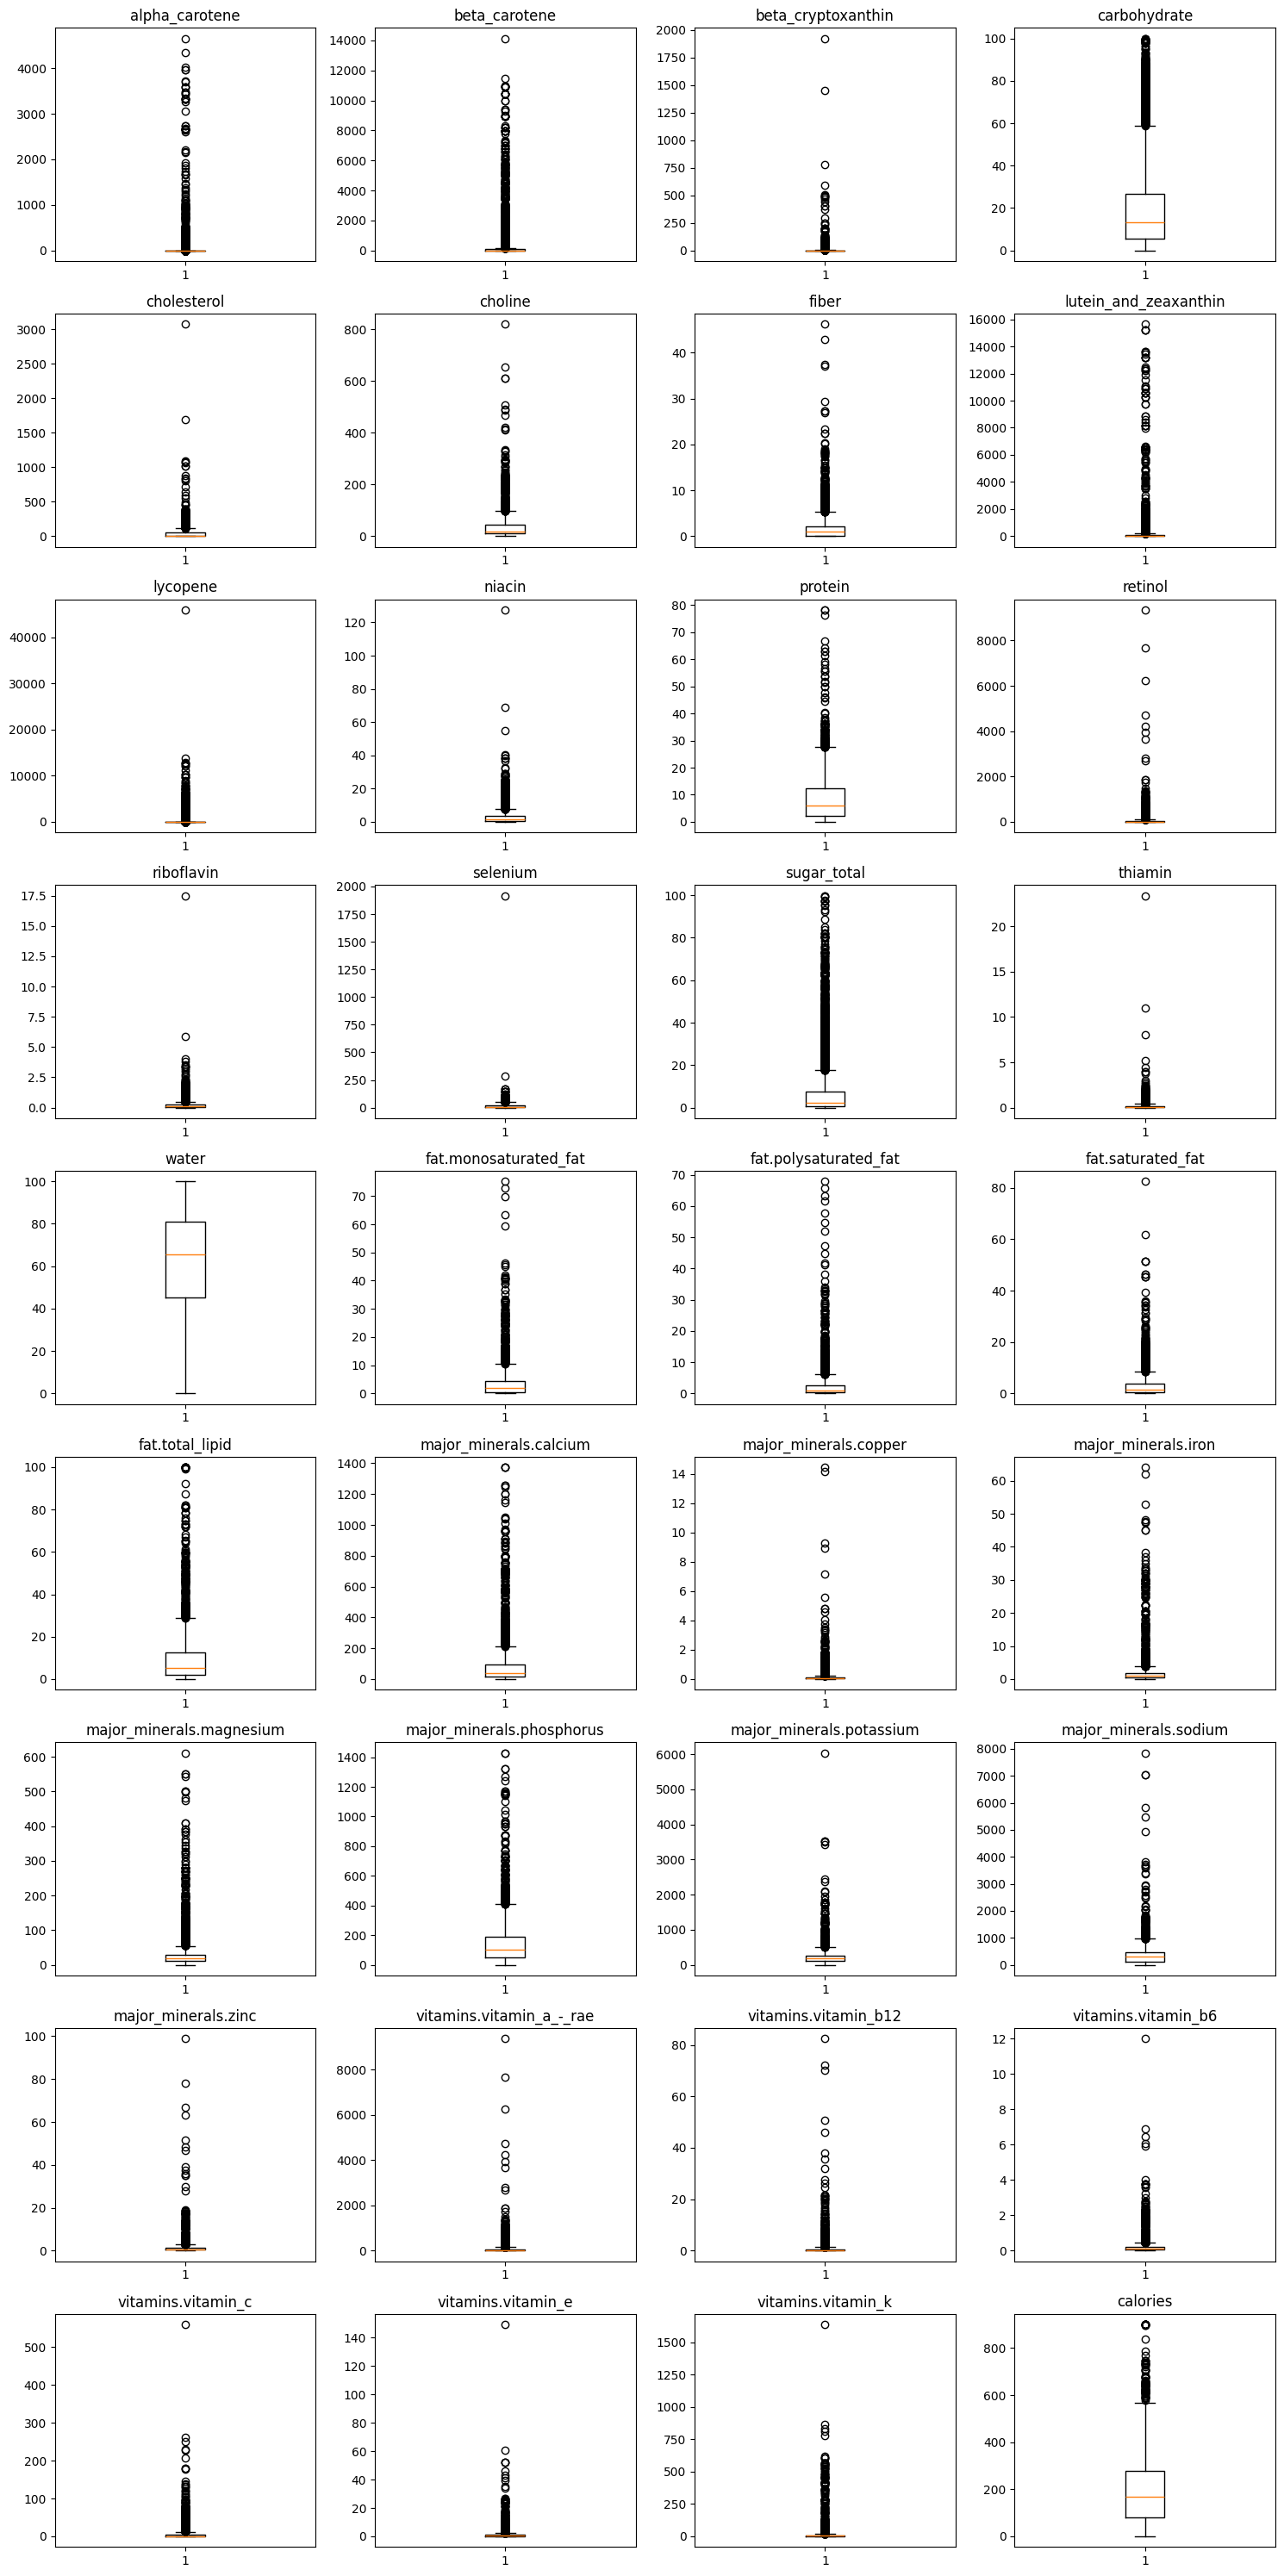

In [20]:
plt.figure(figsize=(15, 30))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(9, 4, i)
    plt.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

Como se puede observar, en cada variable hay muchos outliers, pero no van a ser eliminados porque representan el valor actual de cada nutriente para los alimentos almacenados en este dataset. El proposito de este analisis es resaltar la comida que provee un alto número de nutrientes.

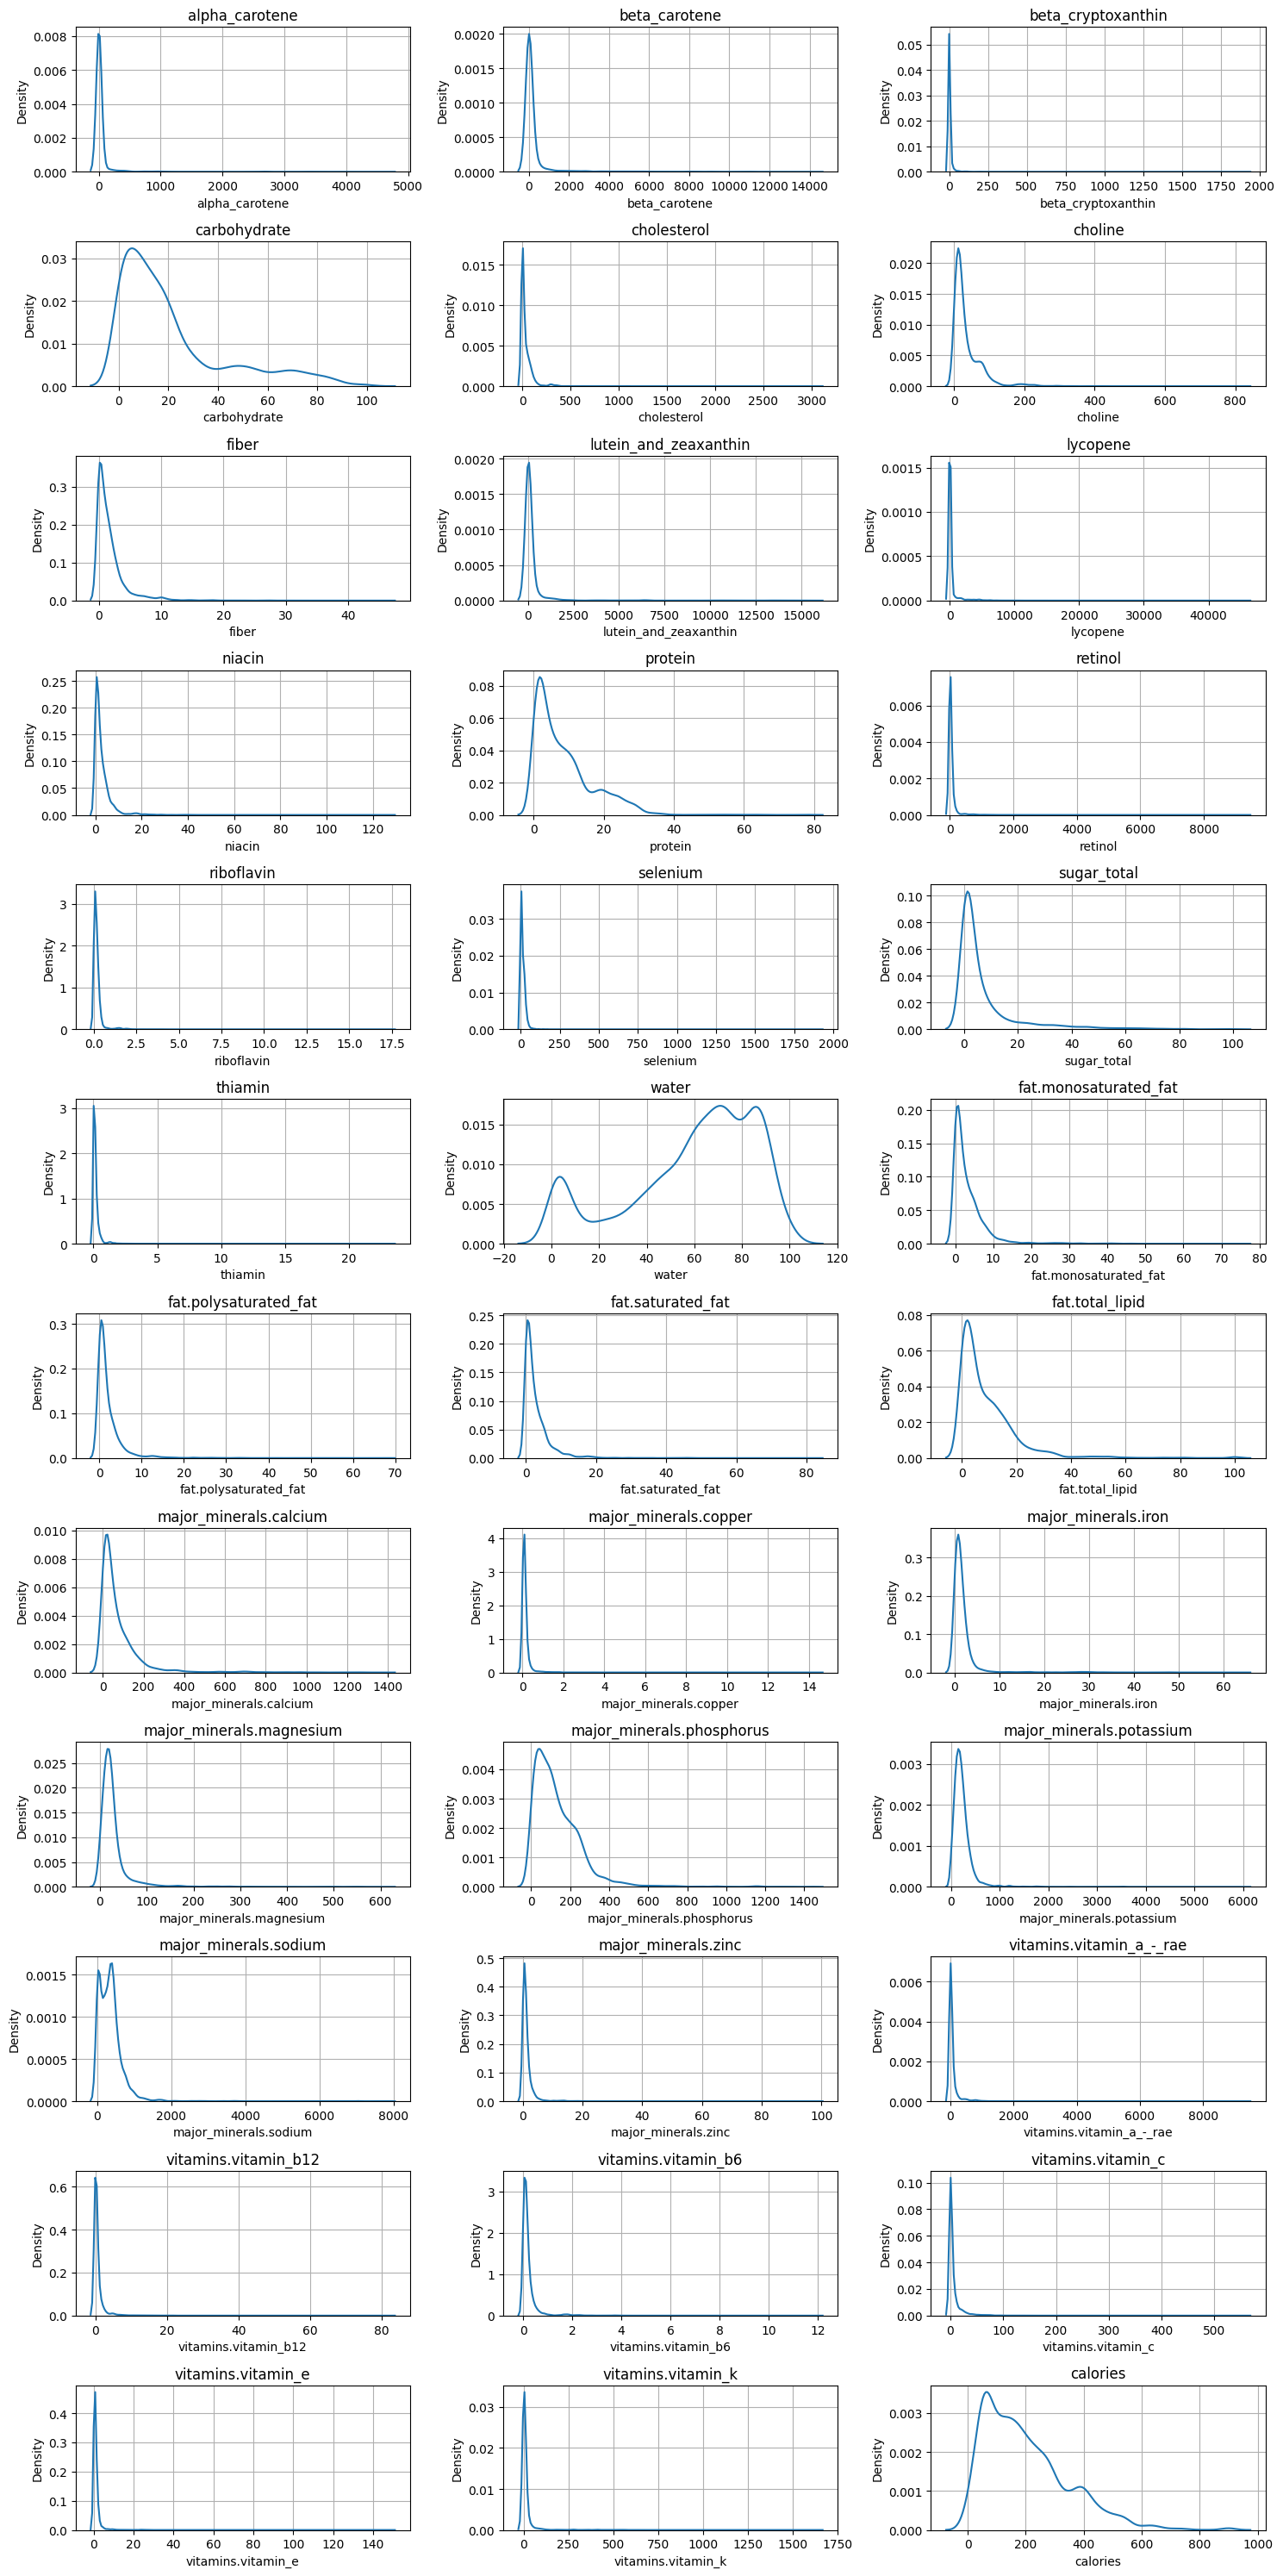

In [21]:
plt.figure(figsize=(15, 30))
for i, column in enumerate(columns_to_plot,1):
    plt.subplot(12, 3, i)
    sns.kdeplot(df[column])
    plt.title(column)
    plt.grid(True)
plt.tight_layout()
plt.show()


### Análisis de la Distribución de Nutrientes en Alimentos

- **Alpha Carotene, Beta Carotene, Beta Cryptoxanthin:** La mayoría de los alimentos tienen un contenido bajo de estos carotenos, con una larga cola hacia valores más altos, indicando que algunos alimentos tienen concentraciones muy elevadas.

- **Carbohydrates (Carbohidratos):** La mayoría de los alimentos tienen un contenido bajo a moderado de carbohidratos, con algunos alimentos que presentan un contenido alto.

- **Cholesterol (Colesterol):** La distribución muestra que la mayoría de los alimentos tienen muy bajo colesterol, pero hay algunos valores atípicos con contenido extremadamente alto.

- **Choline (Colina):** La mayoría de los alimentos tienen un contenido bajo de colina, con pocos alimentos que presentan valores más altos.

- **Fiber (Fibra):** La mayoría de los alimentos tienen un contenido bajo de fibra, pero hay algunos alimentos con alto contenido de fibra.

- **Lutein and Zeaxanthin (Luteína y Zeaxantina), Lycopene (Licopeno):** La mayoría de los alimentos tienen un contenido bajo de estos compuestos, con algunos valores atípicos más altos.

- **Niacin (Niacina), Riboflavin (Riboflavina), Thiamin (Tiamina):** La mayoría de los alimentos tienen un contenido bajo a moderado de estas vitaminas B, con pocos alimentos que presentan valores altos.

- **Protein (Proteína):** La mayoría de los alimentos tienen un contenido bajo a moderado de proteína, con algunos alimentos con contenido muy alto.

- **Retinol:** La mayoría de los alimentos tienen un contenido bajo de retinol, pero hay algunos valores atípicos con contenido muy alto.

- **Selenium (Selenio):** La mayoría de los alimentos tienen un contenido bajo de selenio, con pocos alimentos que presentan valores más altos.

- **Sugar Total (Azúcar Total):** La mayoría de los alimentos tienen un contenido bajo a moderado de azúcares, con algunos alimentos con contenido alto.

- **Water (Agua):** La mayoría de los alimentos tienen un contenido de agua bajo a moderado, con algunos alimentos que presentan un contenido muy alto.

- **Fat (Monounsaturated, Polyunsaturated, Saturated, Total Lipid):** La mayoría de los alimentos tienen un contenido bajo de grasas (monosaturadas, poliinsaturadas, saturadas y totales), pero hay algunos valores atípicos con contenido significativamente más alto.

- **Major Minerals (Calcium, Copper, Iron, Magnesium, Phosphorus, Potassium, Sodium, Zinc):** La mayoría de los alimentos tienen un contenido bajo de estos minerales, con algunos valores atípicos que presentan concentraciones más altas.

- **Vitamins (Vitamin A RAE, Vitamin B12, Vitamin B6, Vitamin C, Vitamin E, Vitamin K):** La mayoría de los alimentos tienen un contenido bajo de estas vitaminas, con pocos alimentos que contienen cantidades altas, como se observa en los picos agudos y colas largas de las distribuciones.

- **Calories (Calorías):** La mayoría de los alimentos tienen un valor calórico bajo, con una larga cola hacia valores más altos, indicando que algunos alimentos son muy altos en calorías.

### Resumen
La distribución de nutrientes, vitaminas, minerales y calorías sigue un patrón donde la mayoría de los alimentos tienen valores bajos a moderados, con algunos valores atípicos que presentan concentraciones significativamente más altas.

### Top 5 Comidas con más contenido de nutrientes

In [22]:
# vitamins_vegetables, macronutrients, fat, colesterol_choline, minerals

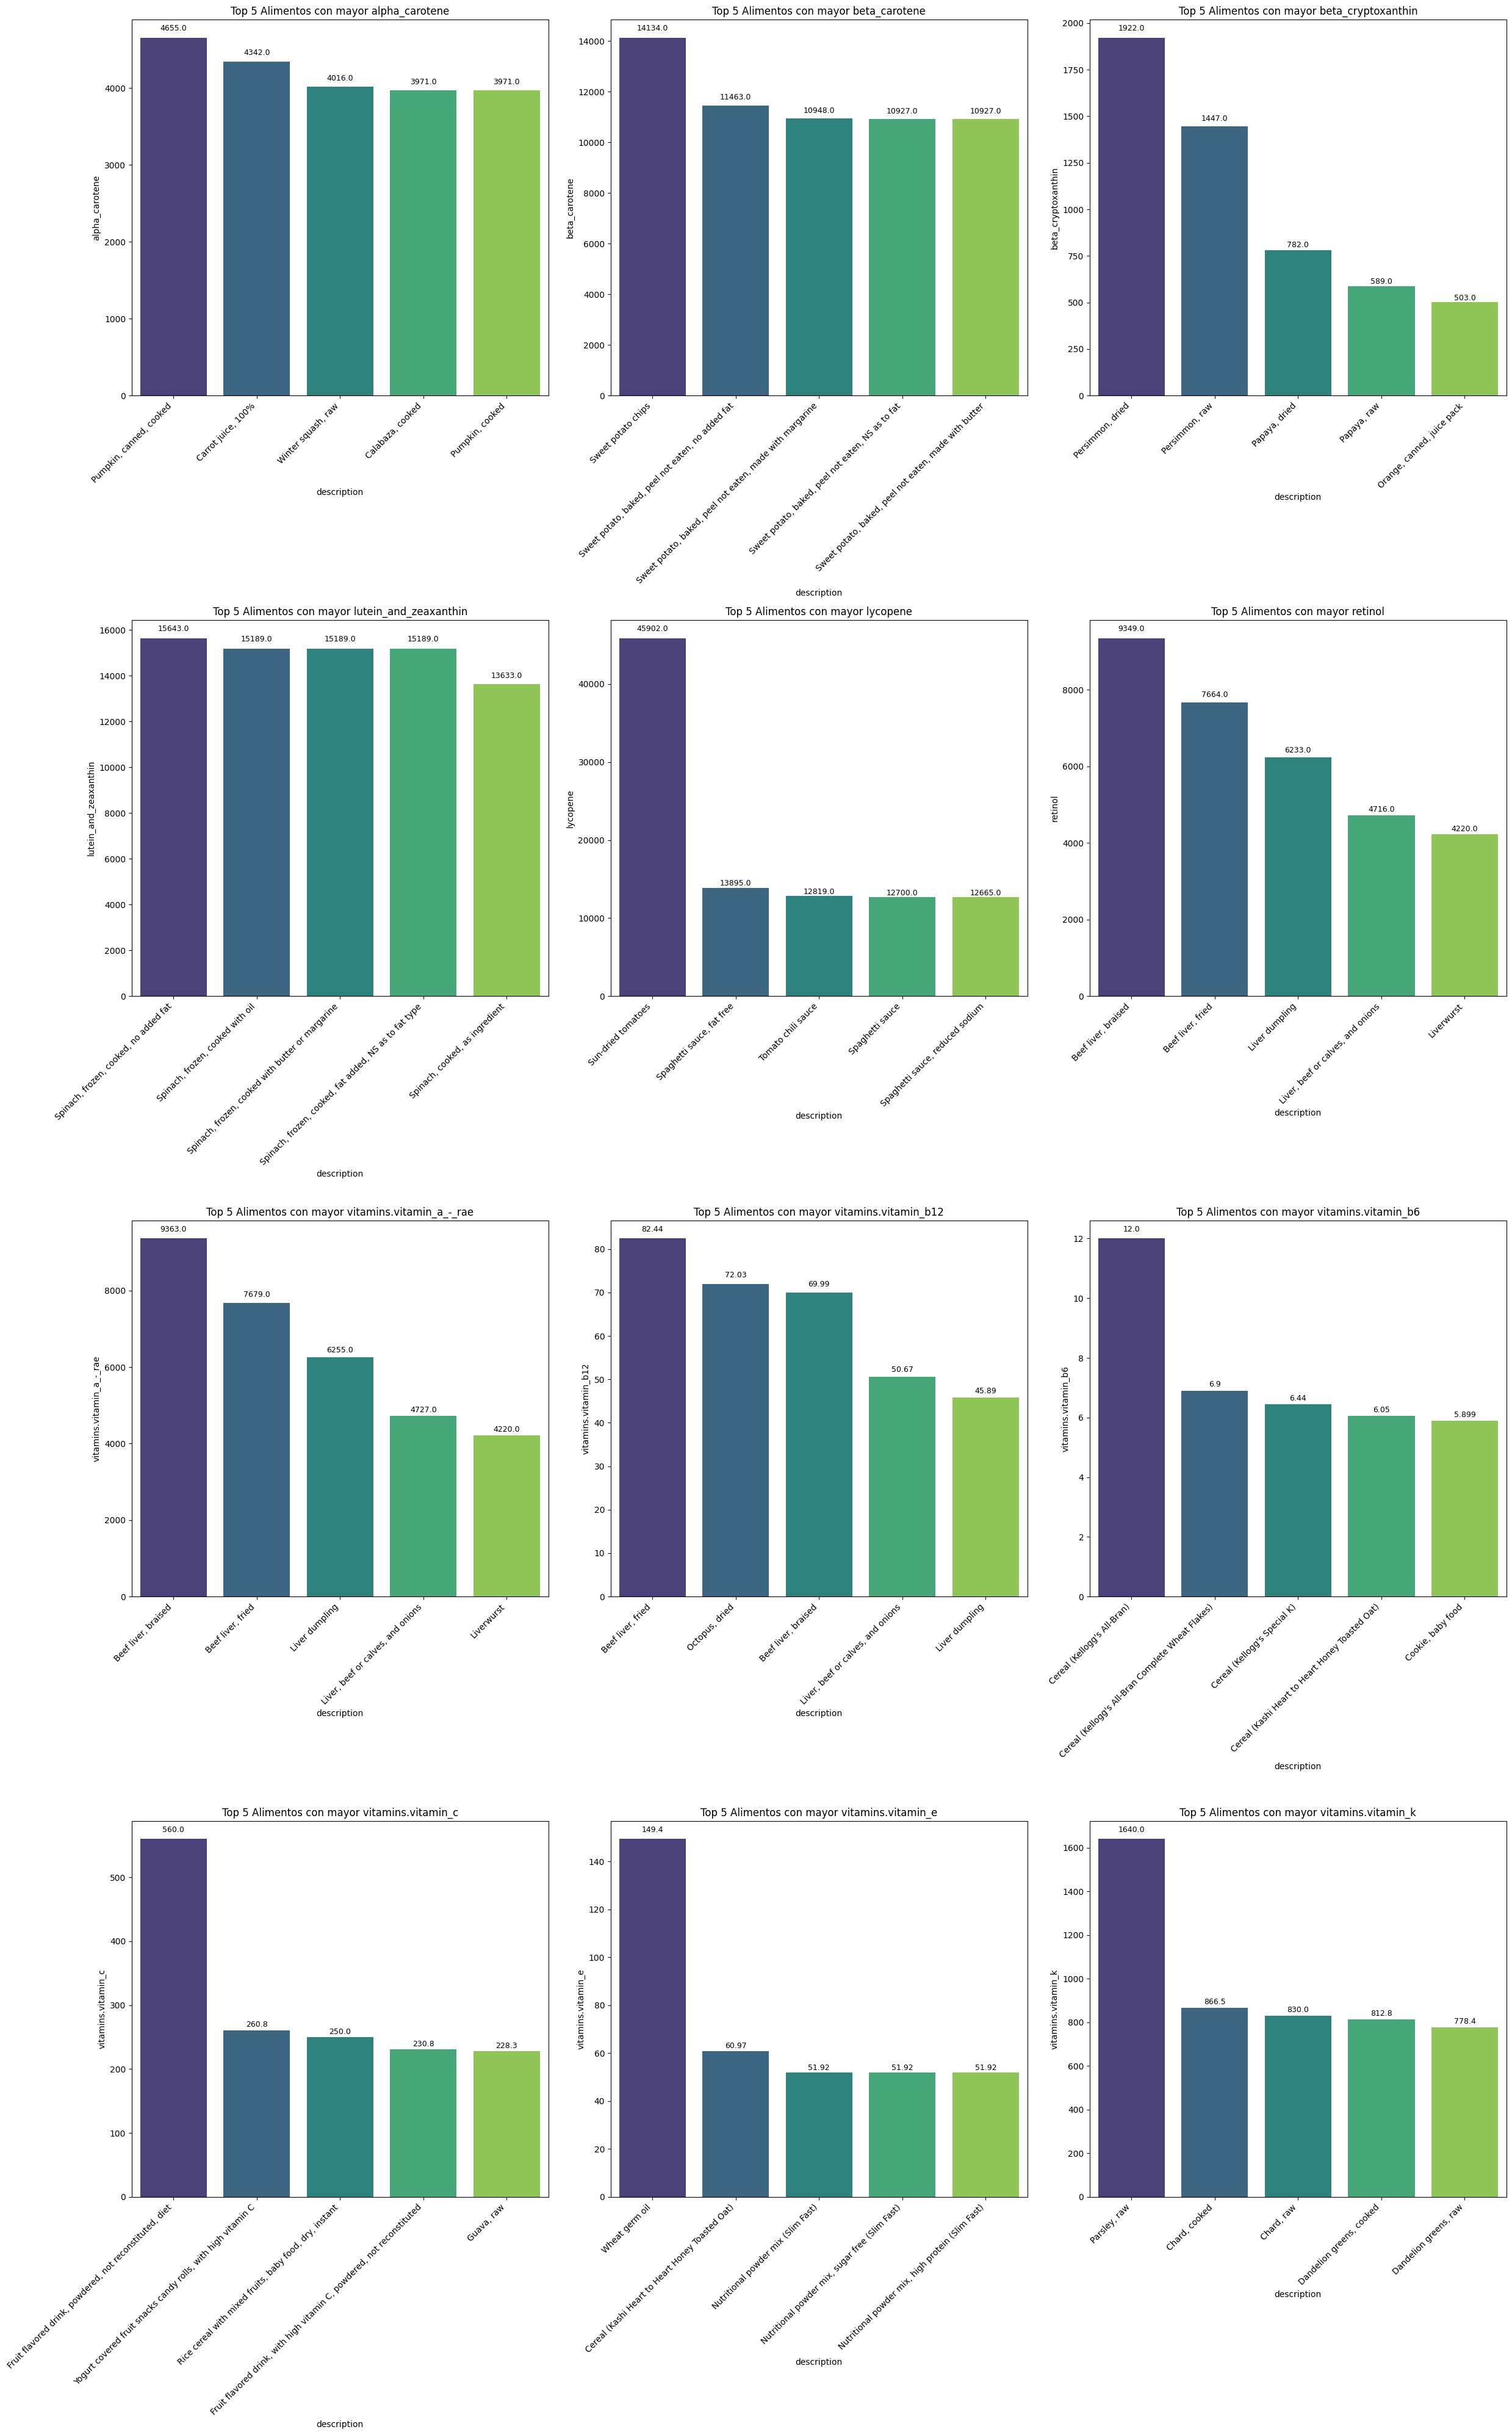

In [23]:
plt.figure(figsize=(25, 40))
for i, column in enumerate(vitamins_vegetables, 1):
    plt.subplot(4, 3, i)
    temp_df = df.sort_values(by=column, ascending=False).head(5)[["description", column]]
    sns.barplot(data=temp_df, x="description", y=column, hue="description", palette="viridis")
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.title(f"Top 5 Alimentos con mayor {column}", fontsize=12)
    # Añadir los valores encima de las barras
    for index, value in enumerate(temp_df[column]):
        plt.text(index, value + (value * 0.02), f"{value}", ha='center', fontsize=9)
        
plt.tight_layout()    
plt.show()

A continuación se presenta una lista de diversos nutrientes. Para cada uno, se enumeran los tres alimentos que presentan las mayores concentraciones según los gráficos analizados previamente:

1.  **Alpha Caroteno**
    * Zanahoria, hervida
    * Zanahoria, cruda
    * Calabaza, hervida

2.  **Beta Caroteno**
    * Batata/Boniato, horneado
    * Zanahoria, hervida
    * Zanahoria, cruda

3.  **Beta Cryptoxantina**
    * Papaya, cruda
    * Pimiento rojo, dulce, hervido
    * Caqui, japonés, seco

4.  **Luteína y Zeaxantina**
    * Col rizada, hervida
    * Espinaca, hervida
    * Hojas de nabo, hervidas

5.  **Licopeno**
    * Productos de tomate, pasta, enlatados
    * Guayaba, rosa, cruda
    * Sandía, cruda

6.  **Retinol**
    * Cordero, hígado, frito
    * Ternera, hígado, frita
    * Pavo, hígado, cocido a fuego lento

7.  **Vitamina A - RAE**
    * Cordero, hígado, frito
    * Ternera, hígado, frita
    * Pavo, hígado, cocido a fuego lento

8.  **Vitamina B12**
    * Almejas, cocidas, calor húmedo
    * Ternera, hígado, frita
    * Cordero, hígado, frito

9.  **Vitamina C**
    * Pimiento rojo, dulce, crudo
    * Zumo de naranja, refrigerado (incluye de concentrado)
    * Pimiento verde, dulce, crudo

10. **Vitamina E**
    * Aceite de germen de trigo
    * Semillas de girasol, pipas, tostadas en seco
    * Almendras

11. **Vitamina K**
    * Col rizada, hervida
    * Berza común, hervida
    * Espinaca, hervida

12. **Agua**
    * Pepino, con piel, crudo
    * Apio, crudo
    * Lechuga iceberg, cruda

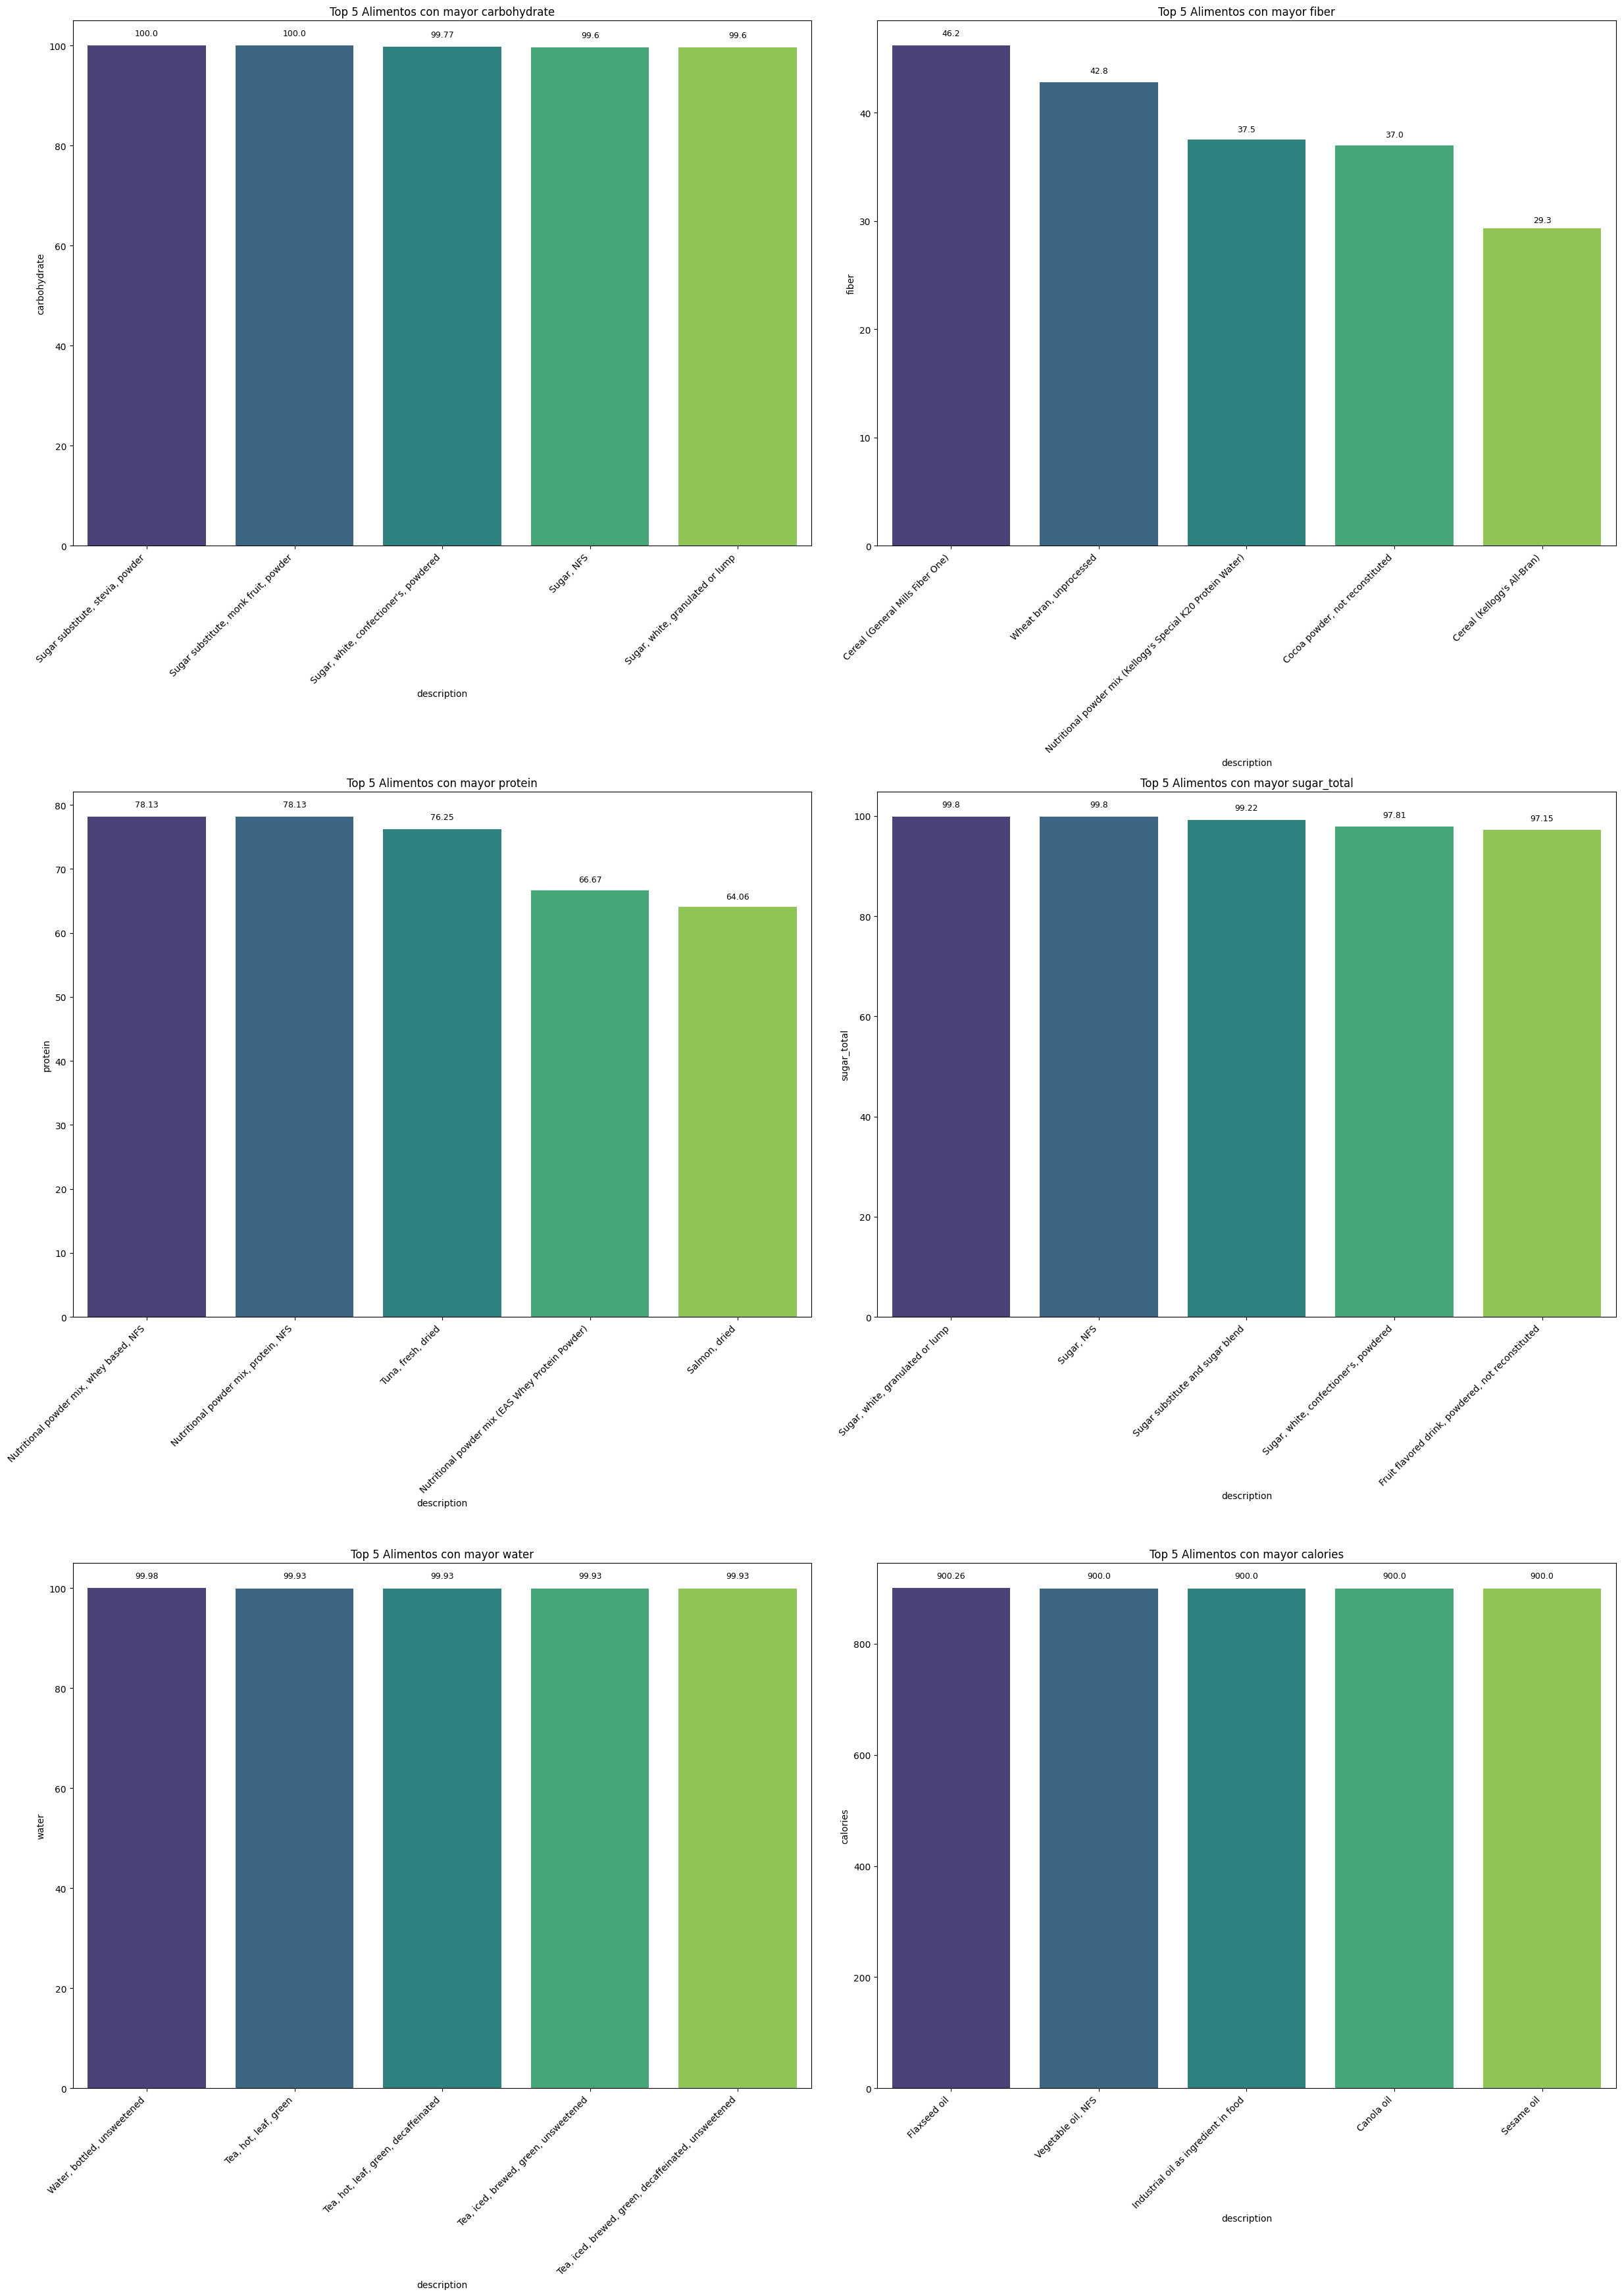

In [24]:
plt.figure(figsize=(25, 35))
for i, column in enumerate(macronutrients, 1):
    plt.subplot(3, 2, i)
    temp_df = df.sort_values(by=column, ascending=False).head(5)[["description", column]]
    sns.barplot(data=temp_df, x="description", y=column, hue="description", palette="viridis")
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.title(f"Top 5 Alimentos con mayor {column}", fontsize=12)
    # Añadir los valores encima de las barras
    for index, value in enumerate(temp_df[column]):
        plt.text(index, value + (value * 0.02), f"{value}", ha='center', fontsize=9)
        
plt.tight_layout()    
plt.show()

A continuación se presenta una lista de diversos nutrientes. Para cada uno, se enumeran los tres alimentos que presentan las mayores concentraciones según los gráficos analizados previamente:

1. **Carbohidratos (Carbohydrate)**  
   * Azúcar blanco granulado (White sugar, granulated)  
   * Azúcar blanco en polvo (White sugar, powdered)  
   * Azúcar blanco en terrones (White sugar, lump)  

2. **Fibra (Fiber)**  
   * Semilla de chía (Chia seeds)  
   * Trigo molido sin procesar (Wheat, unprocessed)  
   * Salvado de trigo (Wheat bran)  

3. **Proteína (Protein)**  
   * Soja molida (Soy, ground)  
   * Proteína de soja en polvo (Soy protein powder)  
   * Salmón seco (Salmon, dried)  

4. **Azúcar Total (Sugar Total)**  
   * Azúcar blanco granulado (White sugar, granulated)  
   * Azúcar blanco en polvo (White sugar, powdered)  
   * Azúcar blanco en terrones (White sugar, lump)  

5. **Agua (Water)**  
   * Pepino crudo sin pelar (Cucumber, unpeeled, raw)  
   * Apio crudo (Celery, raw)  
   * Lechuga cruda (Lettuce, raw)  

6. **Calorías (Calories)**  
   * Aceite de sésamo (Sesame oil)  
   * Aceite vegetal (Vegetable oil)  
   * Aceite de canola (Canola oil)

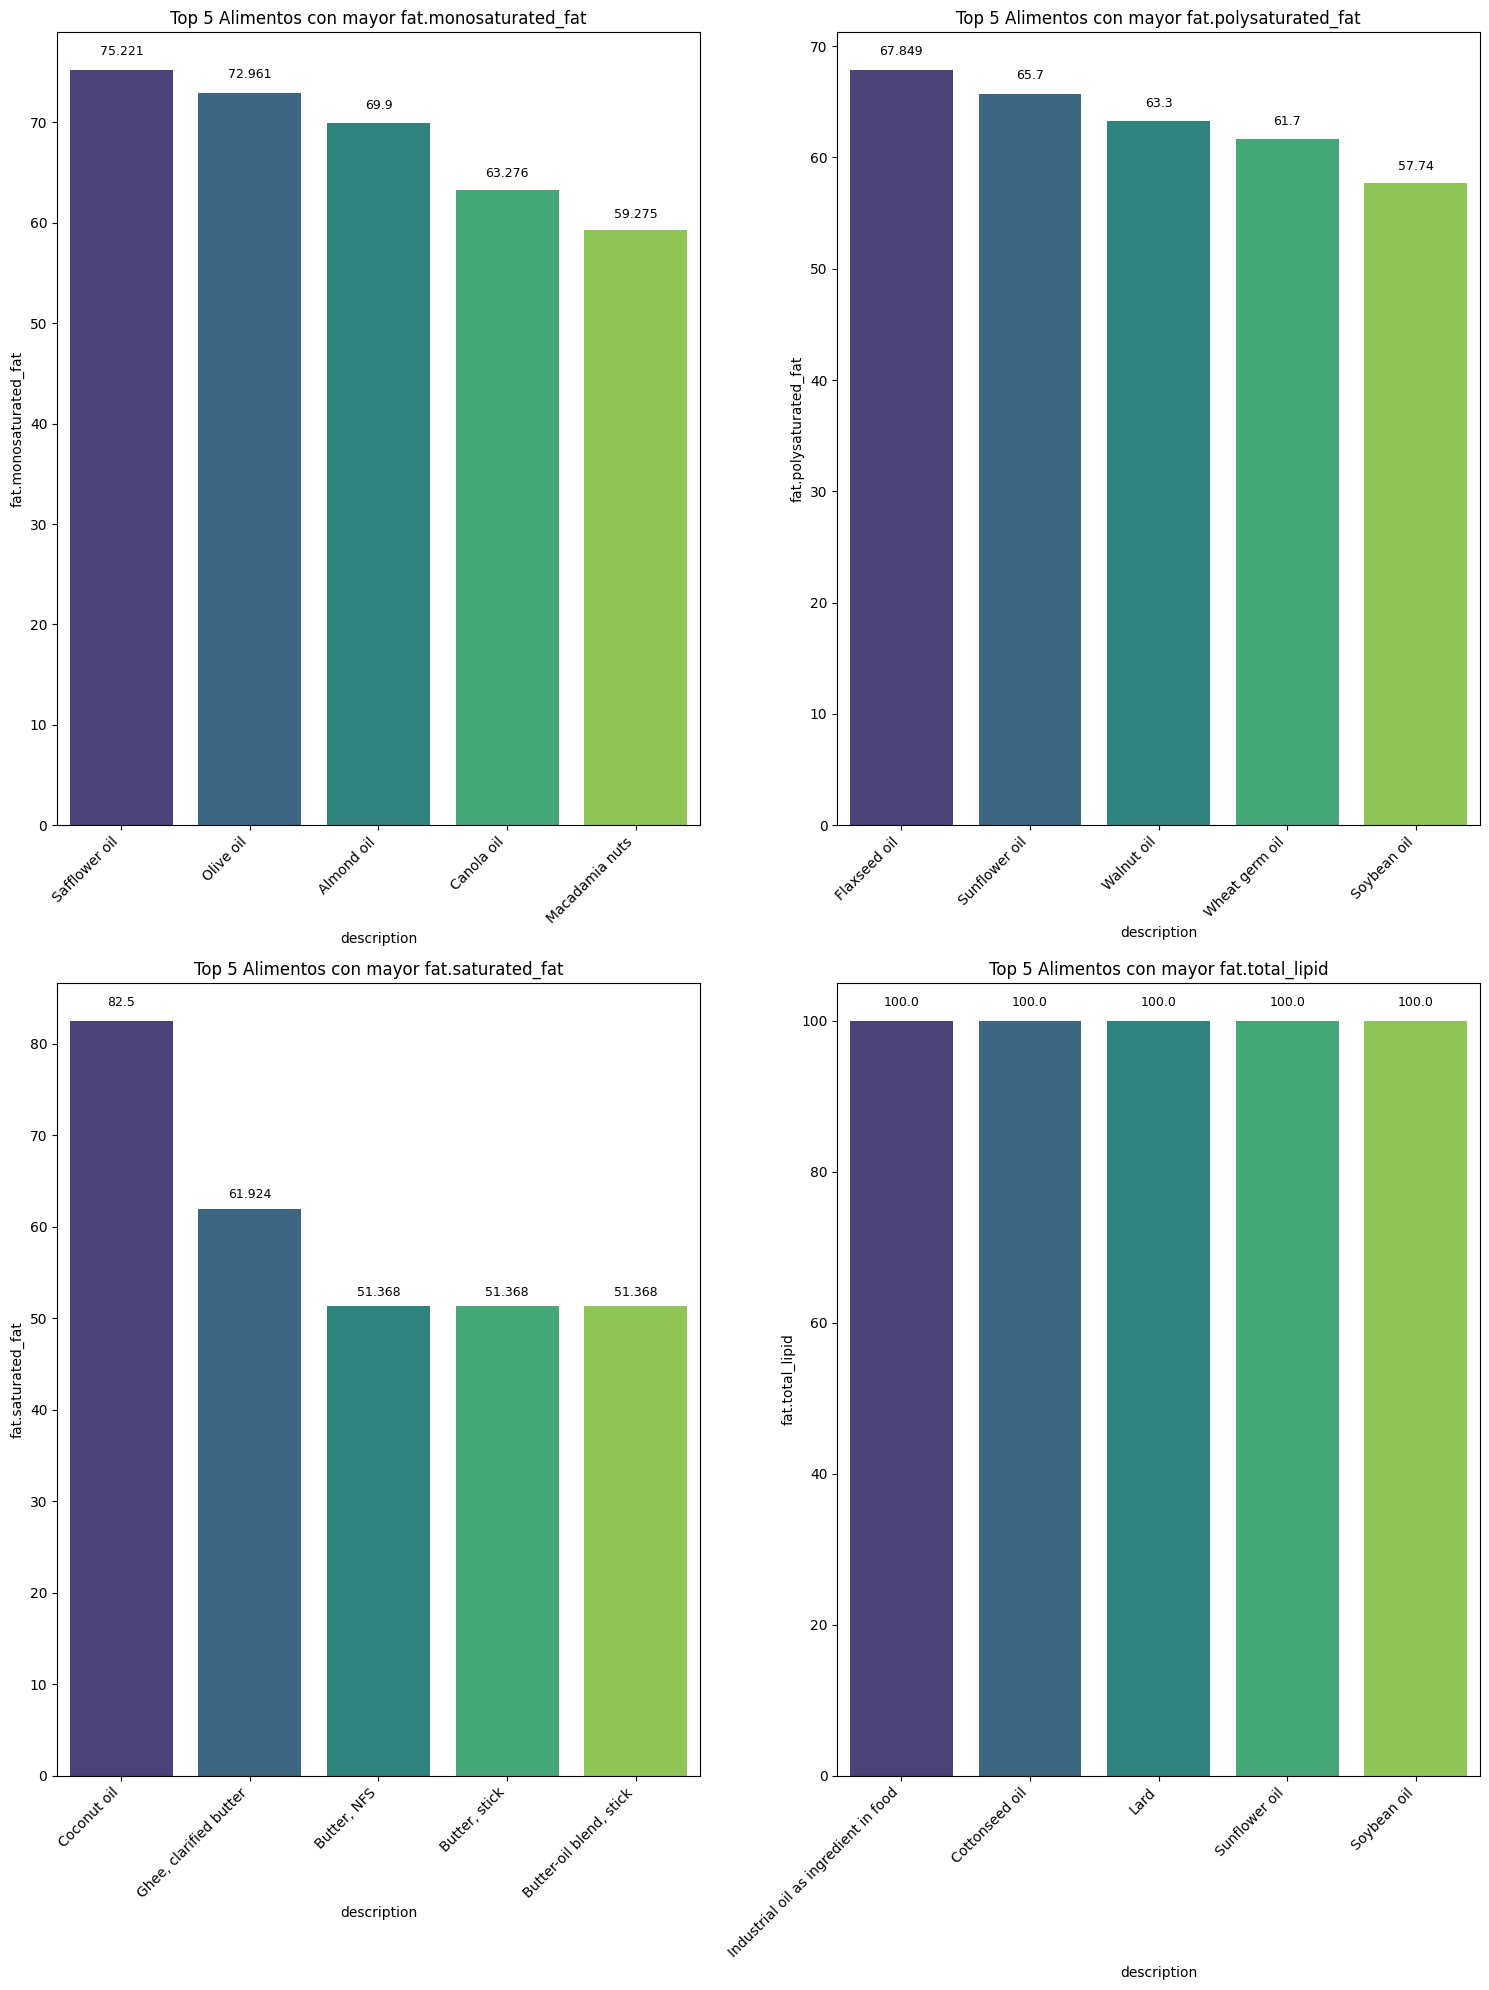

In [25]:
plt.figure(figsize=(15, 20))
for i, column in enumerate(fat, 1):
    plt.subplot(2, 2, i)
    temp_df = df.sort_values(by=column, ascending=False).head(5)[["description", column]]
    sns.barplot(data=temp_df, x="description", y=column, hue="description", palette="viridis")
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.title(f"Top 5 Alimentos con mayor {column}", fontsize=12)
    # Añadir los valores encima de las barras
    for index, value in enumerate(temp_df[column]):
        plt.text(index, value + (value * 0.02), f"{value}", ha='center', fontsize=9)
        
plt.tight_layout()    
plt.show()

A continuación se presenta una lista de diversos tipos de grasas. Para cada uno, se enumeran los tres alimentos/aceites que presentan las mayores concentraciones según los gráficos analizados:

1.  **Grasa Monoinsaturada (Fat.Monosaturated Fat)**
    * Aceite de girasol (Sunflower oil)
    * Aceite de oliva (Olive oil)
    * Aceite de almendra (Almond oil)

2.  **Grasa Poliinsaturada (Fat.Polysaturated Fat)**
    * Aceite de linaza (Flaxseed oil)
    * Aceite de girasol (Sunflower oil)
    * Aceite de nuez (Walnut oil)

3.  **Grasa Saturada (Fat.Saturated Fat)**
    * Aceite de coco (Coconut oil)
    * Ghee, mantequilla clarificada (Ghee, clarified butter)
    * Mantequilla, NFS (Butter, NFS - Not Further Specified)

4.  **Lípido Total (Fat.Total Lipid)**
    * Aceite industrial como ingrediente (Industrial oil in ingredient list)
    * Aceite de semilla de algodón (Cottonseed oil)
    * Manteca de cerdo (Lard)

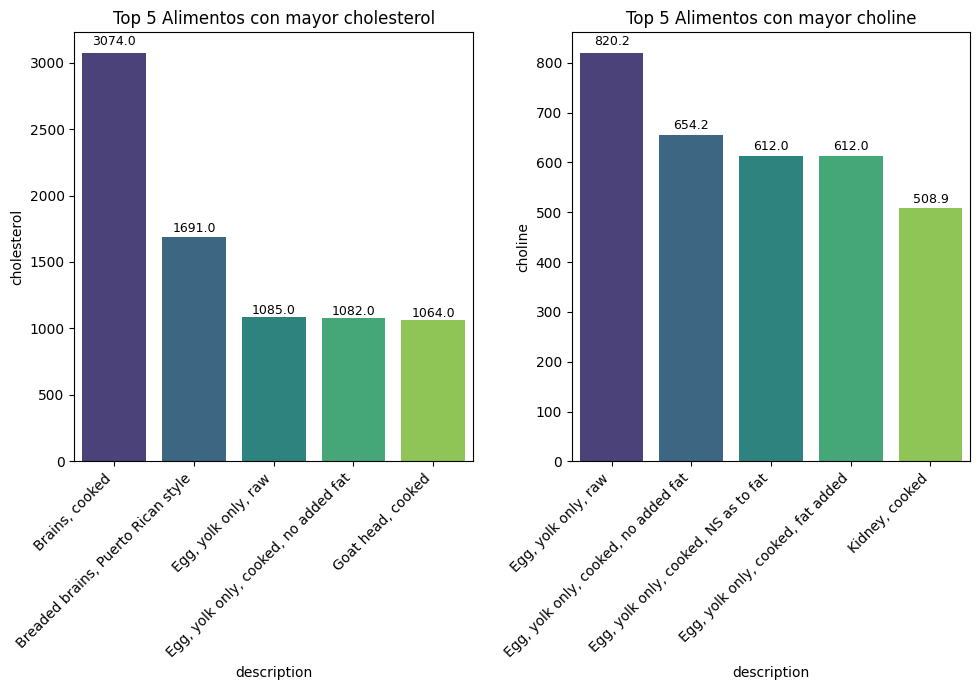

In [26]:
plt.figure(figsize=(10, 7))
for i, column in enumerate(colesterol_choline, 1):
    plt.subplot(1, len(colesterol_choline), i)
    temp_df = df.sort_values(by=column, ascending=False).head(5)[["description", column]]
    sns.barplot(data=temp_df, x="description", y=column, hue="description", palette="viridis")
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.title(f"Top 5 Alimentos con mayor {column}", fontsize=12)
    # Añadir los valores encima de las barras
    for index, value in enumerate(temp_df[column]):
        plt.text(index, value + (value * 0.02), f"{value}", ha='center', fontsize=9)
        
plt.tight_layout()    
plt.show()

A continuación se presenta una lista de diversos nutrientes. Para cada uno, se enumeran los tres alimentos que presentan las mayores concentraciones según los gráficos analizados previamente:

1. **Colesterol (Cholesterol)**  
   * Sesos de ternera cocidos (Beef brains, cooked)  
   * Yema de huevo cocida estilo puertorriqueño (Egg yolk, Puerto Rican style, cooked)  
   * Yema de huevo cruda (Egg yolk, raw)  

2. **Colina (Choline)**  
   * Yema de huevo cruda (Egg yolk, raw)  
   * Yema de huevo cocida sin grasa añadida (Egg yolk, cooked, no added fat)  
   * Yema de huevo cocida con grasa añadida (Egg yolk, cooked, added fat)  

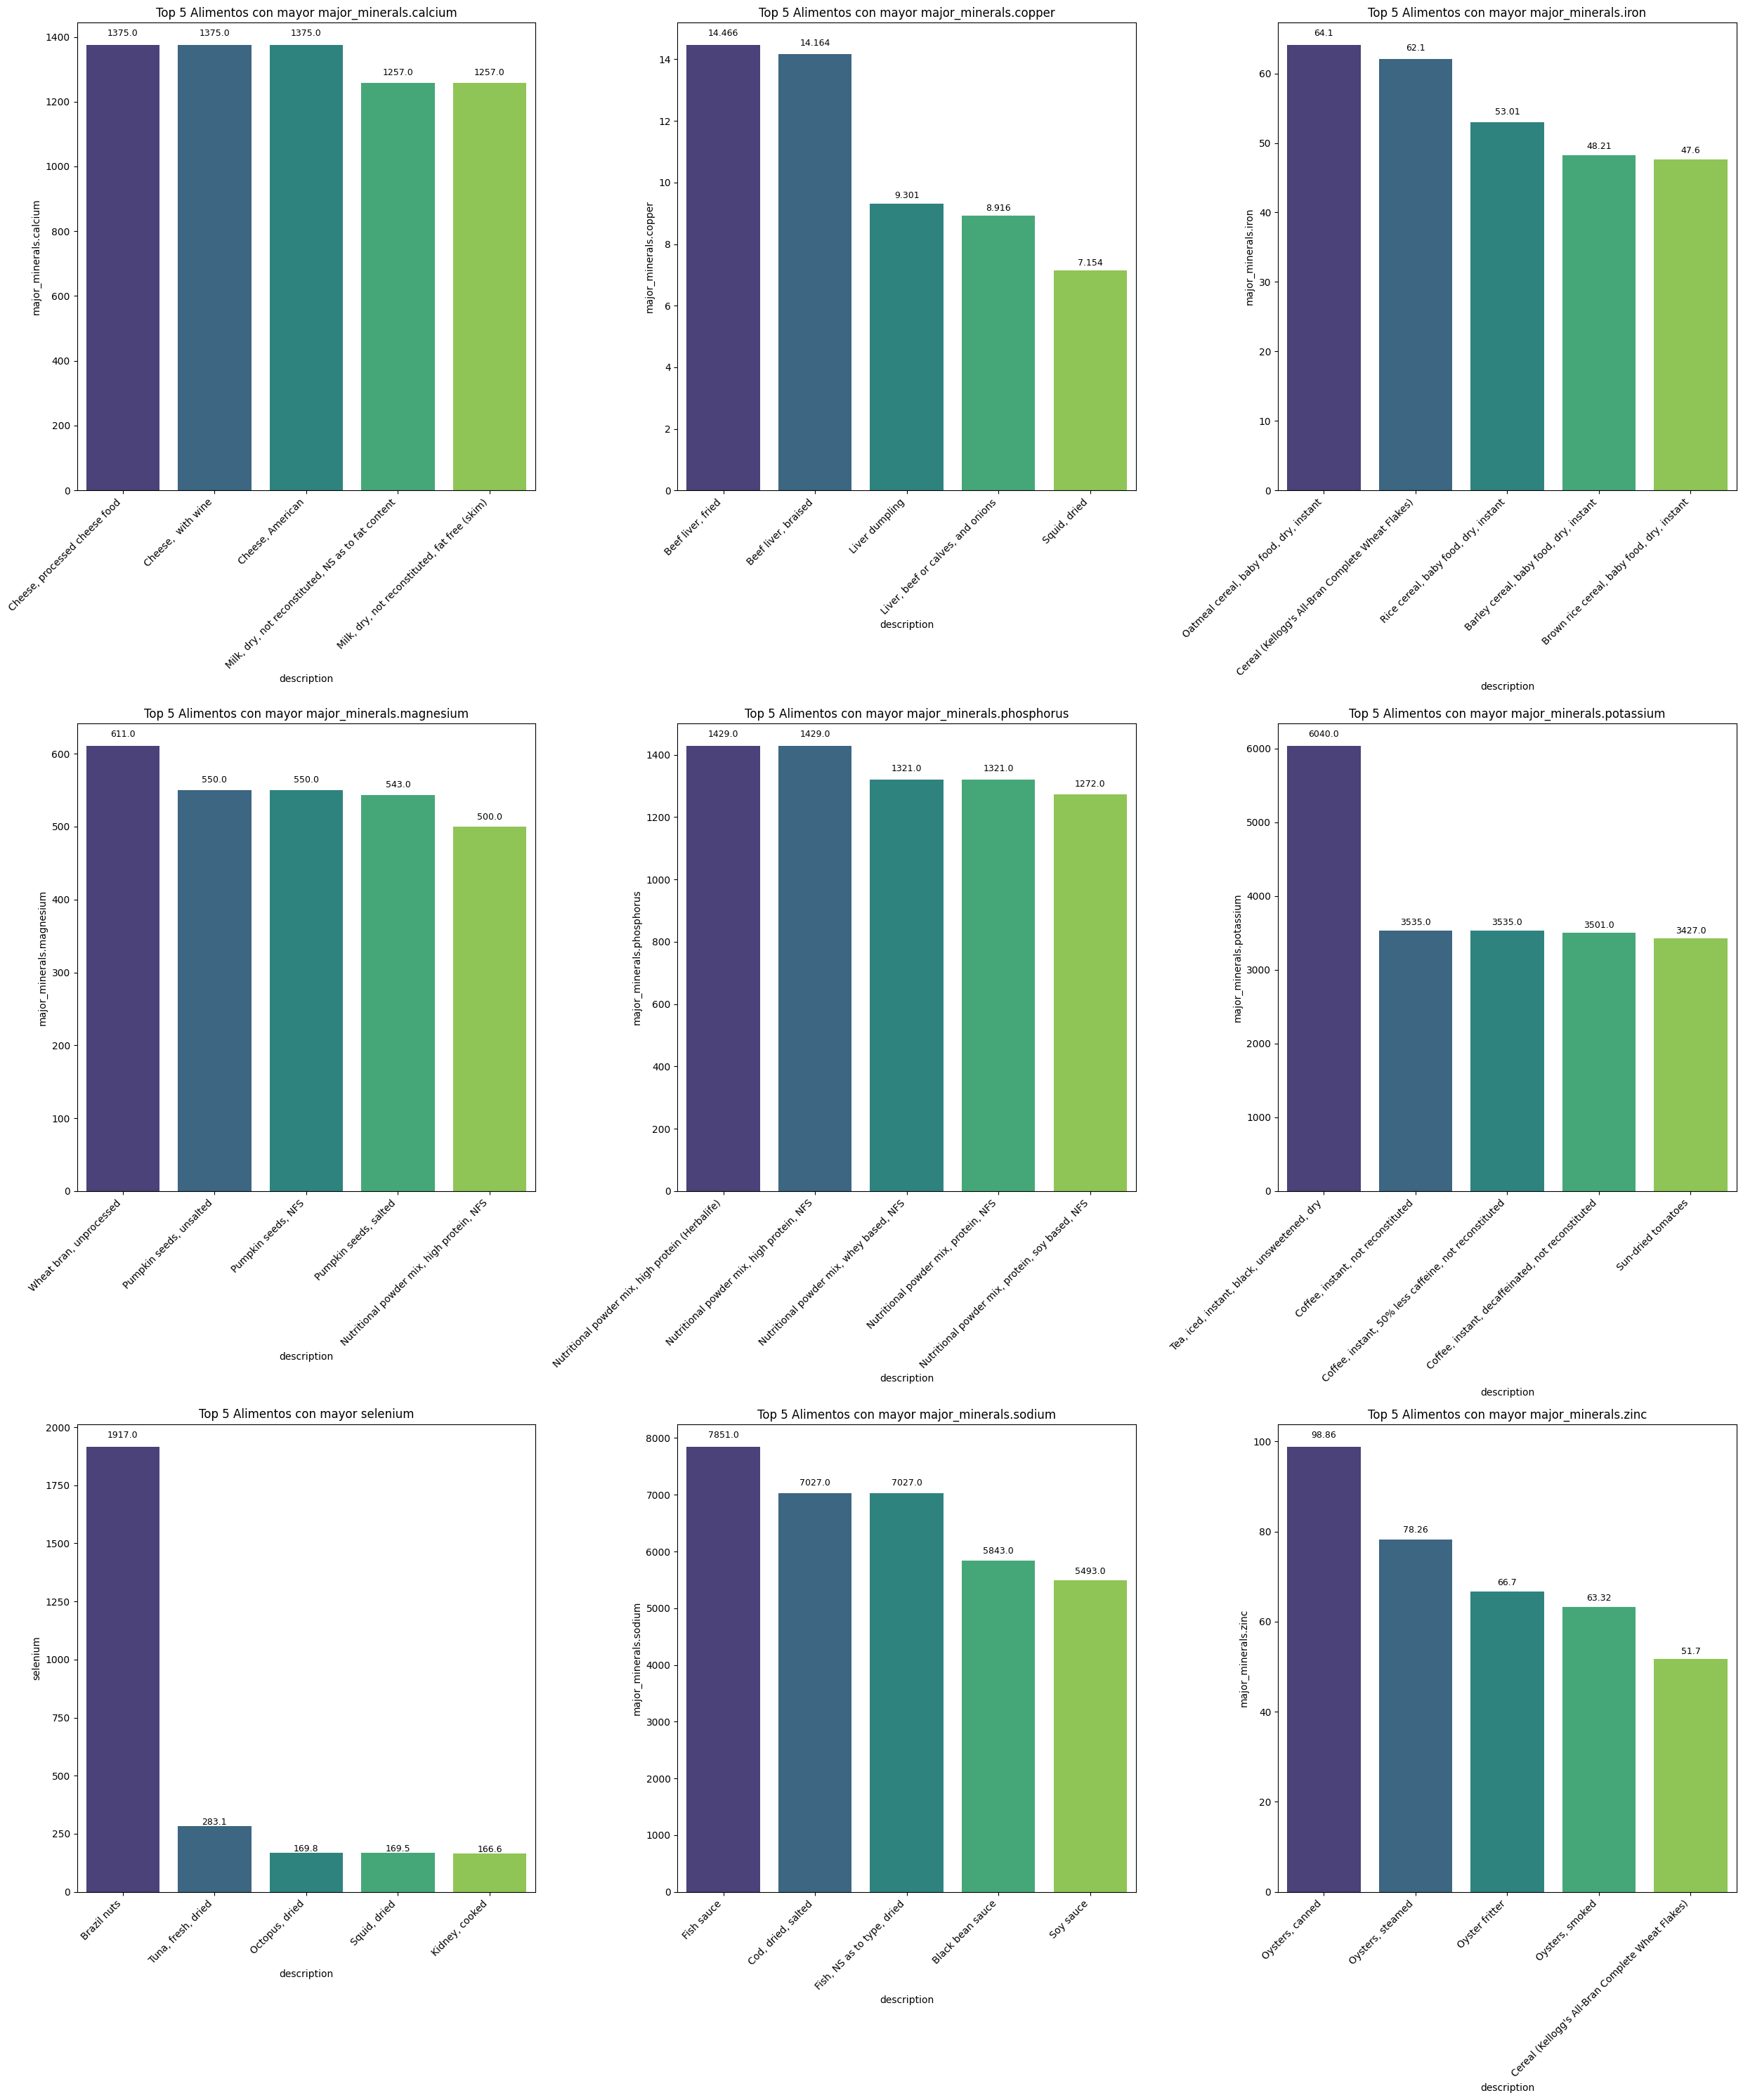

In [27]:
plt.figure(figsize=(25, 30))
for i, column in enumerate(minerals, 1):
    plt.subplot(3, 3, i)
    temp_df = df.sort_values(by=column, ascending=False).head(5)[["description", column]]
    sns.barplot(data=temp_df, x="description", y=column, hue="description", palette="viridis")
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.title(f"Top 5 Alimentos con mayor {column}", fontsize=12)
    # Añadir los valores encima de las barras
    for index, value in enumerate(temp_df[column]):
        plt.text(index, value + (value * 0.02), f"{value}", ha='center', fontsize=9)
        
plt.tight_layout()    
plt.show()

A continuación se presenta una lista de diversos nutrientes. Para cada uno, se enumeran los tres alimentos que presentan las mayores concentraciones según los gráficos analizados previamente:

1. **Calcio (Calcium)**  
   * Queso cheddar (Cheddar cheese)  
   * Leche en polvo descremada (Nonfat dry milk)  
   * Queso ricotta (Ricotta cheese)  

2. **Cobre (Copper)**  
   * Hígado de ternera (Beef liver)  
   * Ostras (Oysters)  
   * Cacao en polvo (Cocoa powder)  

3. **Hierro (Iron)**  
   * Cereales enriquecidos (Enriched cereals)  
   * Moluscos (Mollusks)  
   * Arroz enriquecido (Enriched rice)  

4. **Magnesio (Magnesium)**  
   * Semillas de calabaza (Pumpkin seeds)  
   * Almendras (Almonds)  
   * Espinacas cocidas (Spinach, cooked)  

5. **Fósforo (Phosphorus)**  
   * Queso parmesano (Parmesan cheese)  
   * Salmón cocido (Salmon, cooked)  
   * Pollo asado (Roasted chicken)  

6. **Potasio (Potassium)**  
   * Patata al horno con piel (Baked potato with skin)  
   * Tomate seco (Sun-dried tomato)  
   * Espinacas cocidas (Spinach, cooked)  

7. **Selenio (Selenium)**  
   * Atún fresco (Fresh tuna)  
   * Langosta cocida (Cooked lobster)  
   * Sardinas (Sardines)  

8. **Sodio (Sodium)**  
   * Salsa de soja (Soy sauce)  
   * Caldo en polvo (Bouillon powder)  
   * Queso procesado (Processed cheese)  

9. **Zinc (Zinc)**  
   * Ostras (Oysters)  
   * Carne de res (Beef)  
   * Cordero (Lamb)  

In [ ]:
df.to_csv("../data/csv/food_cleaned.csv", index=False)

In [23]:
unique_categories = df['category'].unique()
for category in unique_categories:
    print(f"'{category}'", end=', ')

'Milk', 'Buttermilk', 'Kefir', 'Goat's milk', 'Non-dairy milk', 'Soy milk', 'Almond milk', 'Rice milk', 'Coconut milk', 'Yogurt', 'Chipotle dip', 'Dill dip', 'Onion dip', 'Ranch dip', 'Spinach dip', 'Tzatziki dip', 'Vegetable dip', 'Yogurt parfait', 'Frozen yogurt', 'Frozen yogurt sandwich', 'Frozen yogurt bar', 'Frozen yogurt cone', 'Chocolate milk', 'Hot chocolate / Cocoa', 'Strawberry milk', 'Eggnog', 'Milk shake', 'Milk shake with malt', 'Licuado or Batido', 'Fruit smoothie', 'Fruit smoothie juice drink', 'Chocolate milk drink', 'Infant formula', 'Whey', 'Cocoa powder', 'Chocolate beverage powder', 'Strawberry beverage powder', 'Cream', 'Coffee creamer', 'Whipped topping', 'Sour cream', 'Dip', 'Ice cream', 'Gelato', 'Ice cream bar', 'Ice cream candy bar', 'Ice cream sandwich', 'Ice cream cookie sandwich', 'Ice cream cone', 'Ice cream soda', 'Ice cream sundae', 'Banana split', 'Light ice cream', 'Soft serve', 'Light ice cream sandwich', 'Light ice cream bar', 'Creamsicle', 'Fudgesic